# Correlating NGSS and State Based Science Standards   
Capstone Project - The Flatiron School - By Kristen Davis

In April of 2013 a collection of rigorous and internationally benchmarked standards for K-12 science education standards were released, called [Next Generation Science Standards (NGSS)](https://www.nextgenscience.org/). These standards were crafted to prepare students to be better decision makers about scientific and technical issues and to apply science to their daily lives. By blending core science knowledge with scientific practices, students are engaged in a more relevant context that deepens their understanding and helps them build what they need to move forward with their education. However, these standards were of voluntary adoption at the time and many states chose not to change their current (common core) standards. 

Currently, 18 states have fully adopted the NGSS for their K -12 science curriculum, 26 are 'aligned' to the NGS standards and eight have independently developed standards. Much qualitative work is done to measure alignment. Each of these states deployed teams of industry experts to spend months to achieve this alignment. Yet little quantitative work has been applied to understand alignment. With the surge in tools provided in the Natural Language Processing package, the idea that an organization could quantify its alignment is within reach.  By identifying word frequencies and text patterns in the NGSS standards and comparing them to state standards, this project aims to do just that, providing not only insight into the similarities and differences of science education across America, but also develop a tool that could be used more broadly to quantify alignment cross industry. 

# Libraries & Data Packages 
A broad array of libraries and functions that are implemented through the notebook including custom built functions.

In [123]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
#custom functions 
from projectfunctions import * 

In [125]:
#Data Collections
from bs4 import BeautifulSoup 
import requests  
from time import sleep  
import numpy as np 
from random import randint

#Data Analysis 
import pandas as pd
import numpy as np  
np.random.seed(0) 
import pickle

#Data Visulaization 
import matplotlib.pyplot as plt   
import plotly.express as px 
import plotly.graph_objects as go 
import plotly.figure_factory as ff 
from urllib.request import urlopen
import json  
import seaborn as sns


#Natural Language Processing 
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words("english")
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist 
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.collocations import * 
import string 
import re 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import gensim 
from gensim.parsing.preprocessing import preprocess_documents 
import py_stringmatching as sm


#Modeling 
from sklearn.cluster import MiniBatchKMeans, KMeans 
from sklearn.decomposition import PCA  

from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.metrics import calinski_harabasz_score, confusion_matrix 
from sklearn.metrics import classification_report 

from sklearn.datasets import fetch_20newsgroups 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB  
from scipy.spatial.distance import pdist, squareform 
from sklearn.manifold import TSNE 
from collections import defaultdict 
from sklearn.pipeline import make_pipeline

# NGSS Standards  
A set of K - 12 Science standards centered around three dimensions: core ideas, practices, and cross cutting concepts. This will be the primary text used in this project and the benchmark used in analysis and comparison.

## Text Processing

The first step is reading in and cleaning the NGSS standards. This pdf document includes not only the specific science standard but also a general introduction into each grade, giving a context for the meaning and weight the creators put on certain ideas, concepts and words. General processing can be compiled into a function to open the file, tokenize the document and then remove general English language stop words and numbers that may be included in the text.

In [126]:
ngss = general_processing('ngs')

Now that I have a generally cleaned corpus I want to apply text specific cleaning. Examples of this would include words to indicate level, such as 'high school' or 'kindergarten' etc. 

In [127]:
#look at the top 50 words on general process ngss  
ngss_generalclean_freqdist = FreqDist(ngss)
ngss_generalclean_freqdist.most_common(50)

[('hs', 1497),
 ('ess', 1412),
 ('ps', 1326),
 ('ms', 1295),
 ('ls', 1185),
 ('evidence', 467),
 ('core', 438),
 ('ideas', 415),
 ('energy', 389),
 ('include', 305),
 ('using', 304),
 ('information', 302),
 ('engineering', 299),
 ('use', 296),
 ('data', 292),
 ('students', 289),
 ('ets', 286),
 ('systems', 284),
 ('natural', 268),
 ('assessment', 266),
 ('disciplinary', 262),
 ('models', 259),
 ('solutions', 254),
 ('performance', 244),
 ('expectations', 240),
 ('earth', 239),
 ('concepts', 232),
 ('scientific', 216),
 ('design', 215),
 ('connections', 206),
 ('understanding', 201),
 ('explanations', 200),
 ('system', 197),
 ('practices', 192),
 ('matter', 179),
 ('statement', 179),
 ('model', 179),
 ('patterns', 176),
 ('clarification', 176),
 ('examples', 173),
 ('experiences', 170),
 ('builds', 168),
 ('grade', 165),
 ('different', 163),
 ('progresses', 163),
 ('framework', 159),
 ('describe', 158),
 ('based', 157),
 ('world', 156),
 ('organisms', 155)]

Using the above as a reference, I can remove frequently occurring words that will not add value or skew results. These words include administrative words (eg. reserved, high frequency classifying words (eg. hs). This processes is by no means extensive and future work could include additional cleaning (of low frequency words) and exploration of how word removal/ inclusion affects comparison and analysis. 


In [181]:
#remove additional stop words
ngss_stopwords_list = ['hs', 'ms', 'ls', 'ess', 'ps', 'state', 'standards', 
                       'permisssion', 'inc', 'september', 'rights reserved', 
                       'ets', 'science', 'rights', 'reserved', 'section', 
                       'entitled', 'marked', 'asterisk', 'science', 'archive', 
                      'preformance', 'expectations', 'assessment', 'boundary',
                       'sciences',  'achieve', 'reproduced', 'verbatium',
                       'reprinted', 'permission', 'ideas verbatium', 'mp',
                       'could', 'grade', 'framework', 'one', 'dcis']
ngss_processed = [word for word in ngss if word not in ngss_stopwords_list] 

#re examine frequency list
ngss_freqdist = FreqDist(ngss_processed)
ngss_top10 = ngss_freqdist.most_common(10) 
print(ngss_top10)

[('evidence', 467), ('core', 438), ('ideas', 415), ('energy', 389), ('include', 305), ('using', 304), ('information', 302), ('engineering', 299), ('use', 296), ('data', 292)]


The most frequently occurring words are: Evidence, Core, Ideas, Energy, Include. These words clearly represent what the NGSS believe is important to high quality science education. Thus we should see these words (or synonyms) appear with high frequency in state standards that are aligned with the NGSS standards.

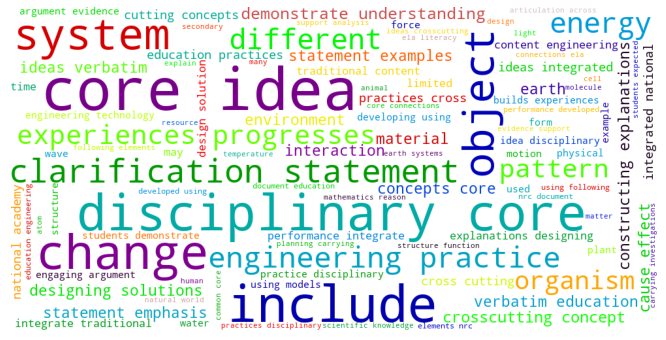

In [129]:
#ngss word cloud 
word_cloud(ngss_processed)

## Word Relationships

In addition to frequency patterns, I think it is important to understand words patterns, which will yield context to the words within the document. By examining bigrams and point matrix indexes and Gensim word embedding, more insight can be gained into how the NGSS standards talk about the process and importances while learning science. 

In [130]:
#ngss bigram pairs
bigram_generator(ngss_processed, 5)

[(('core', 'ideas'), 0.007140023800079333),
 (('disciplinary', 'core'), 0.006421063070210234),
 (('clarification', 'statement'), 0.00436334787782626),
 (('experiences', 'progresses'), 0.002826259420864736),
 (('demonstrate', 'understanding'), 0.002503966679888933)]

In [131]:
#ngss pmi pairs 
pmi_generator(ngss_processed, 100)

[(('clarification', 'statement'), 7.815964625594283),
 (('experiences', 'progresses'), 7.374551326654505),
 (('demonstrate', 'understanding'), 7.295712939008153),
 (('disciplinary', 'core'), 6.508378629406469),
 (('core', 'ideas'), 5.997950818465391)]

Disciplinary core ideas, this is one the strands NGSS has built itself on and is referenced in context at a very high frequency. After that clarification statement, while this is an administrative word I left it in because I believe it demonstrates the intent within the NGSS to be understandable, to be readable thus we see clarification statements through out the document as a it attempts to explain itself. The final two pairings speak to student experience, a progression of experience and an demonstration of understanding. The fundamentals of learning.

In [160]:
#word ebeddings 
model = gensim.models.Word2Vec([ngss_processed], min_count=100, window=5, 
                               size=150)

Examine the most positively & negatively (similar/ dissimilar) associated words within the corpus. Sentiment analysis will further deepen our understanding of the document. 

evidence [('based', 0.9998002648353577), ('scientific', 0.9997898936271667), ('multiple', 0.9997636675834656), ('connections', 0.999751091003418), ('data', 0.9997294545173645), ('analysis', 0.9997241497039795), ('support', 0.9997191429138184), ('world', 0.9996944069862366), ('specific', 0.9996687173843384), ('problem', 0.9996632933616638)] 

core [('ideas', 0.9997625946998596), ('disciplinary', 0.9997290968894958), ('idea', 0.9996986389160156), ('practices', 0.9996917843818665), ('performance', 0.9996646642684937), ('concepts', 0.9995585680007935), ('education', 0.9995260834693909), ('understanding', 0.9993265867233276), ('integrate', 0.9993119835853577), ('demonstrate', 0.9992212653160095)] 

ideas [('idea', 0.999806821346283), ('disciplinary', 0.9997782111167908), ('performance', 0.9997686147689819), ('core', 0.9997625350952148), ('concepts', 0.9997243881225586), ('practices', 0.9997187852859497), ('education', 0.9996455907821655), ('understanding', 0.9995875954627991), ('students', 

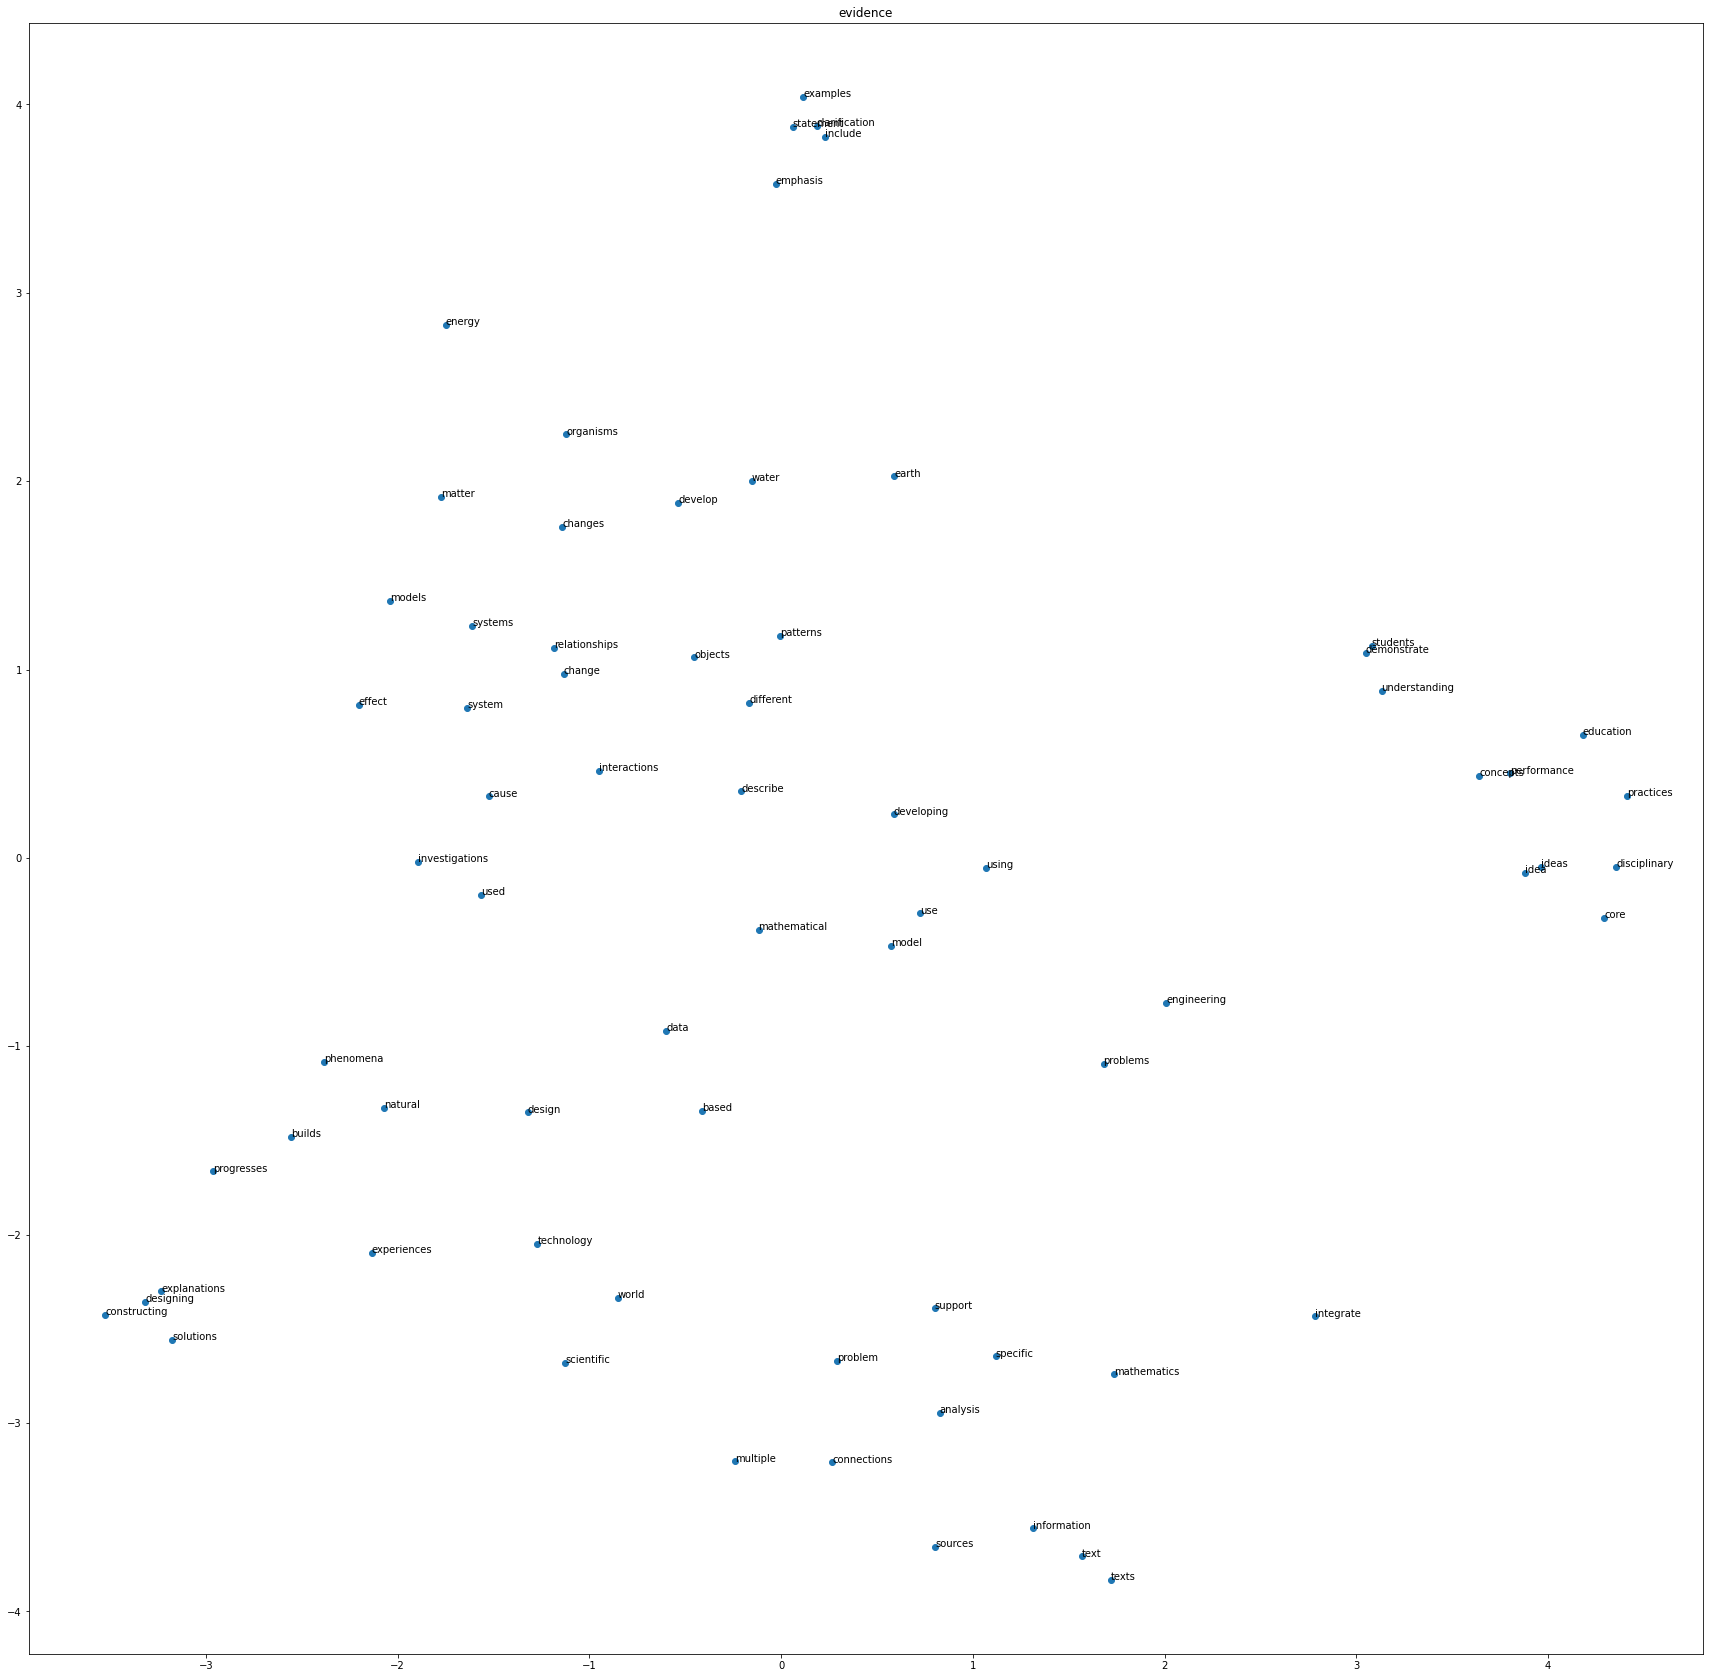

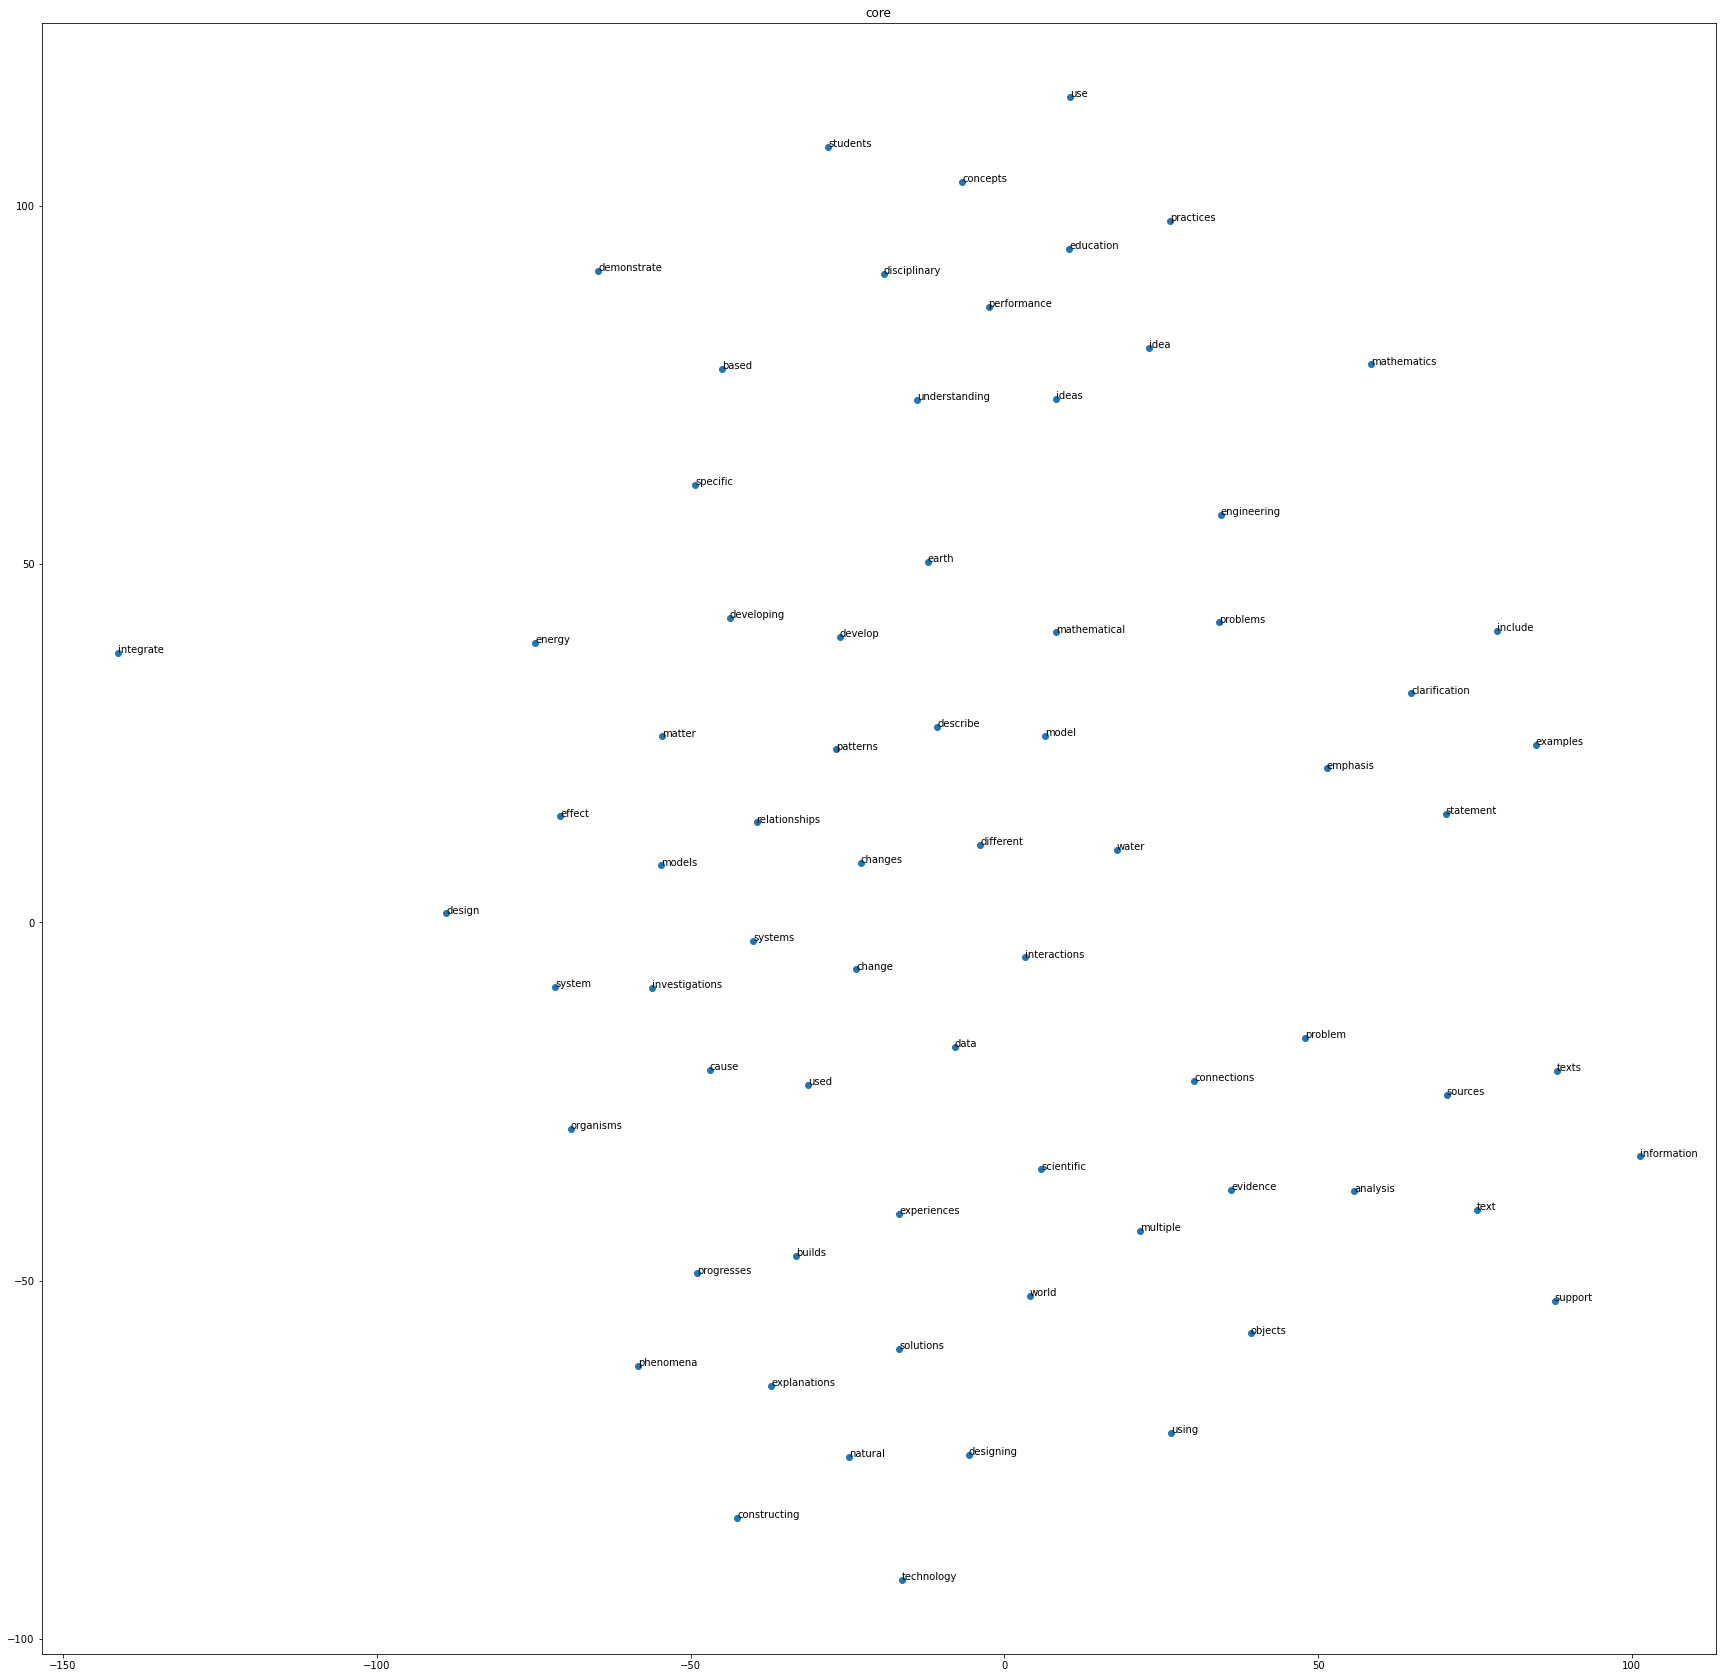

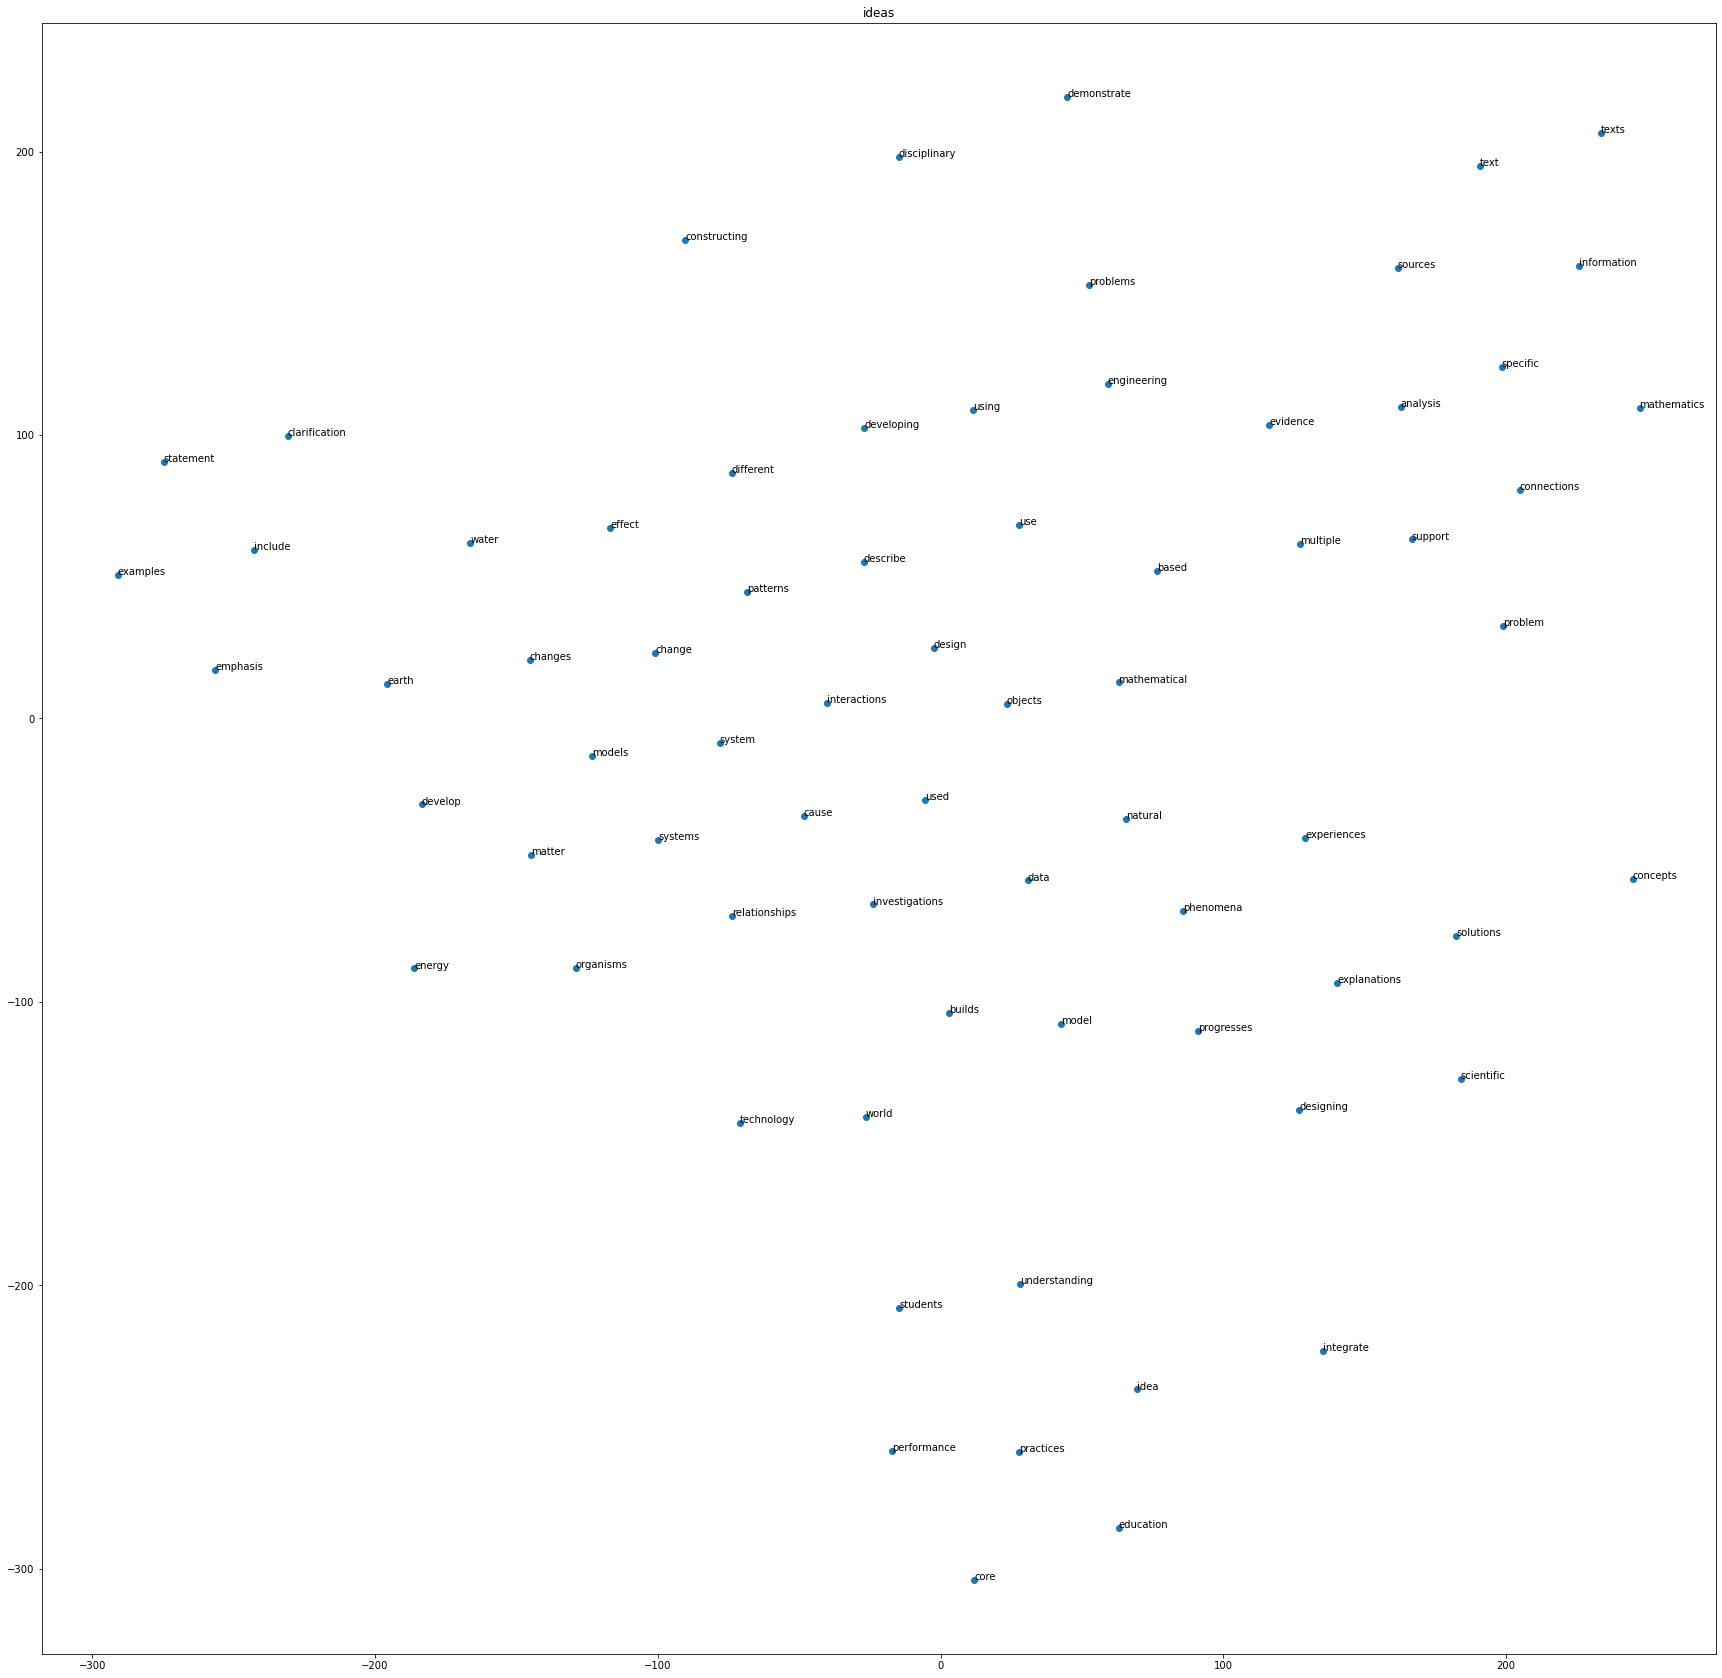

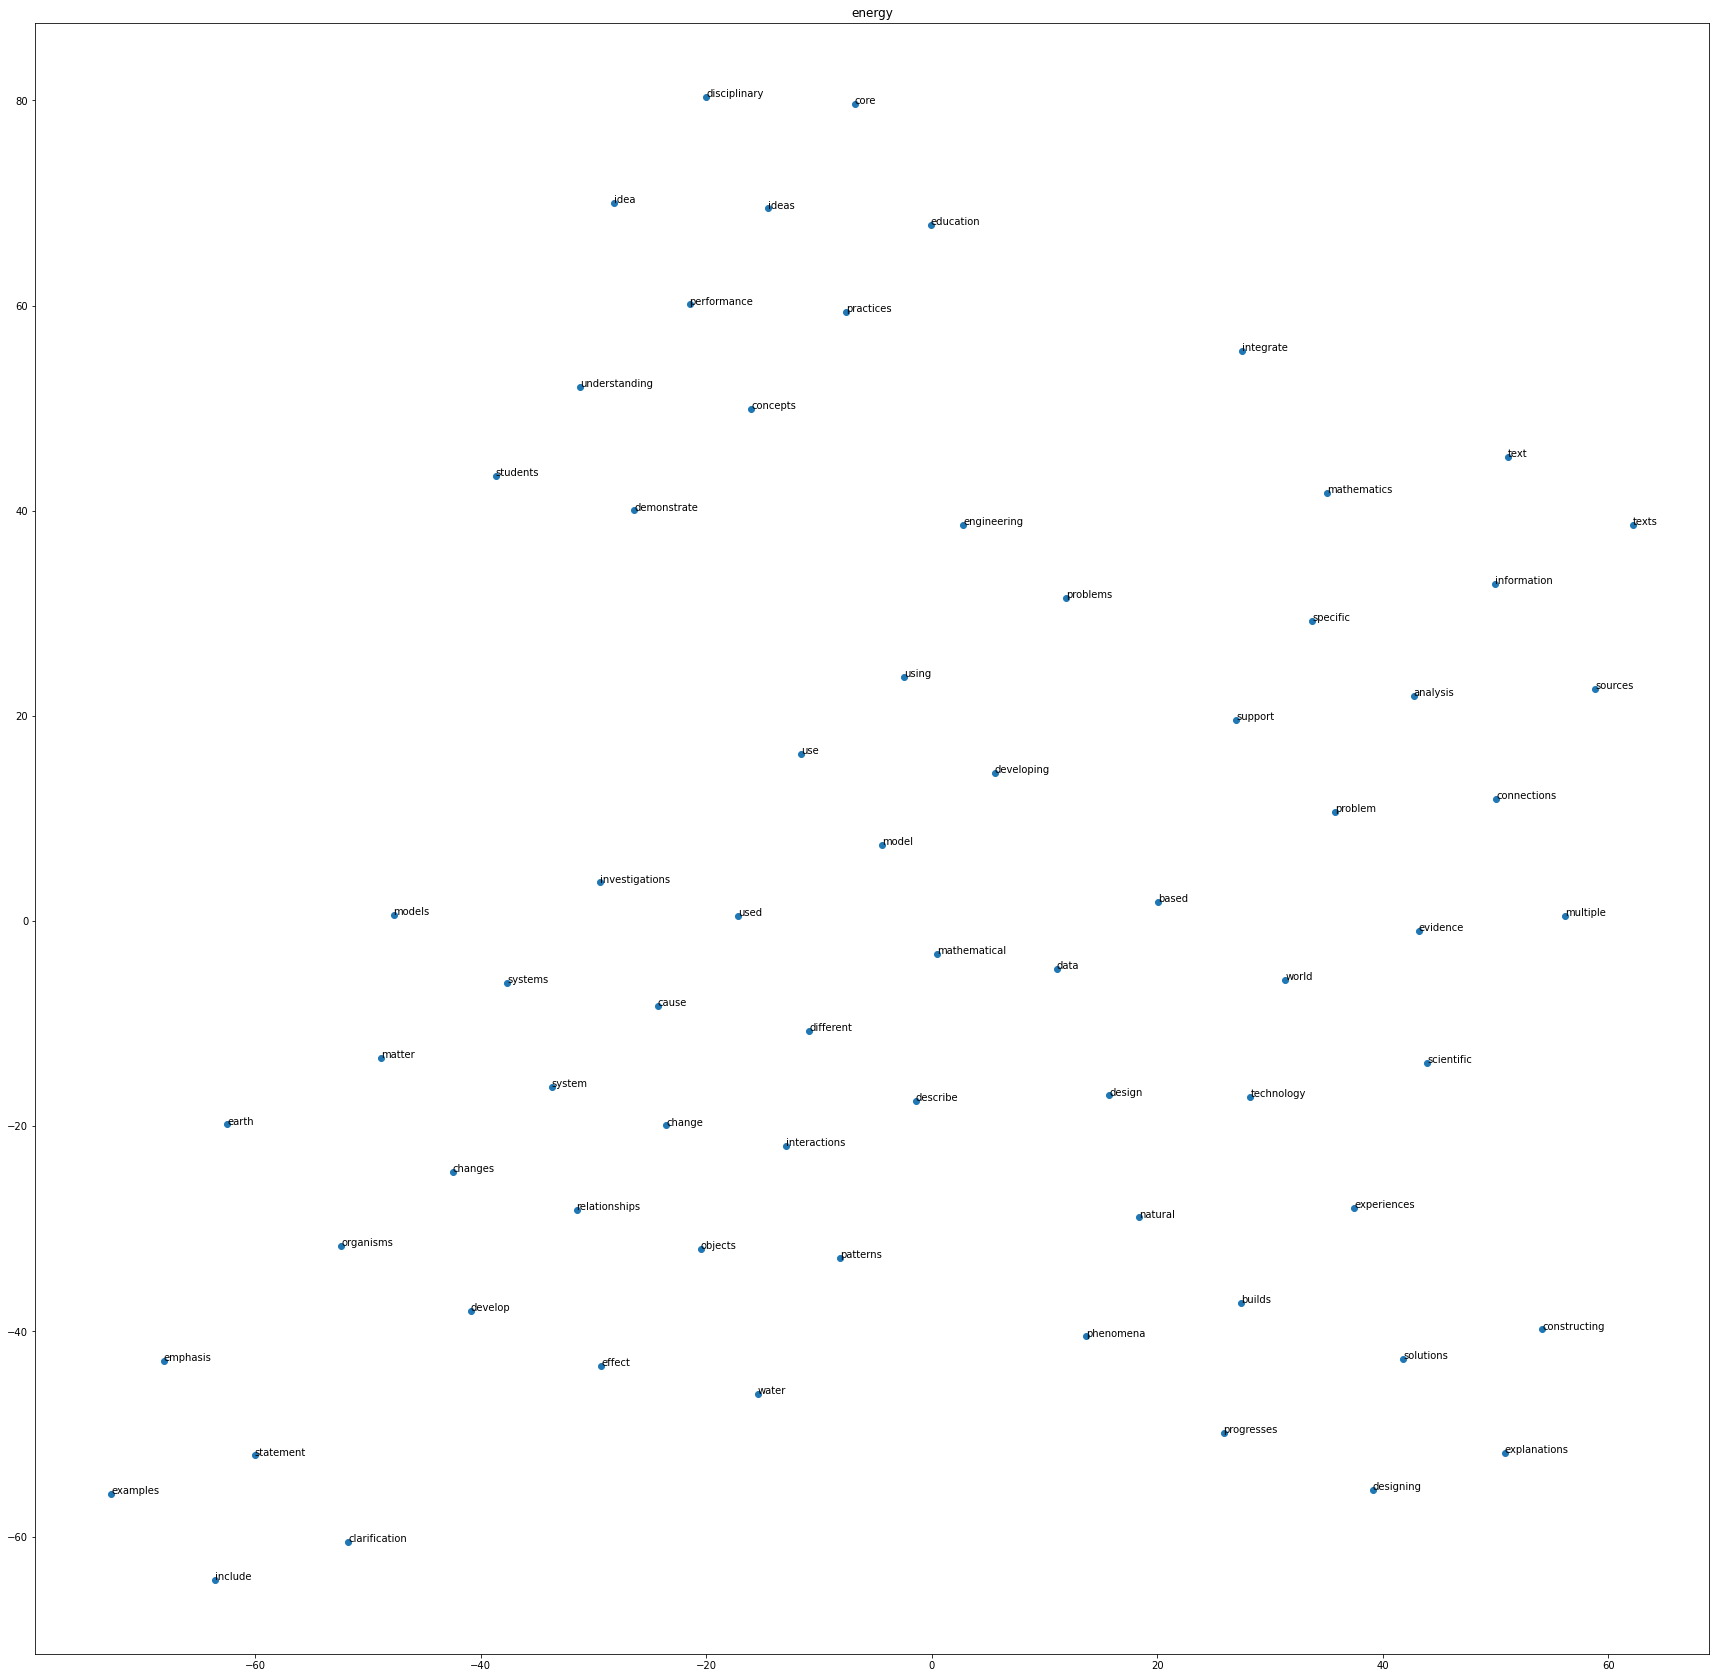

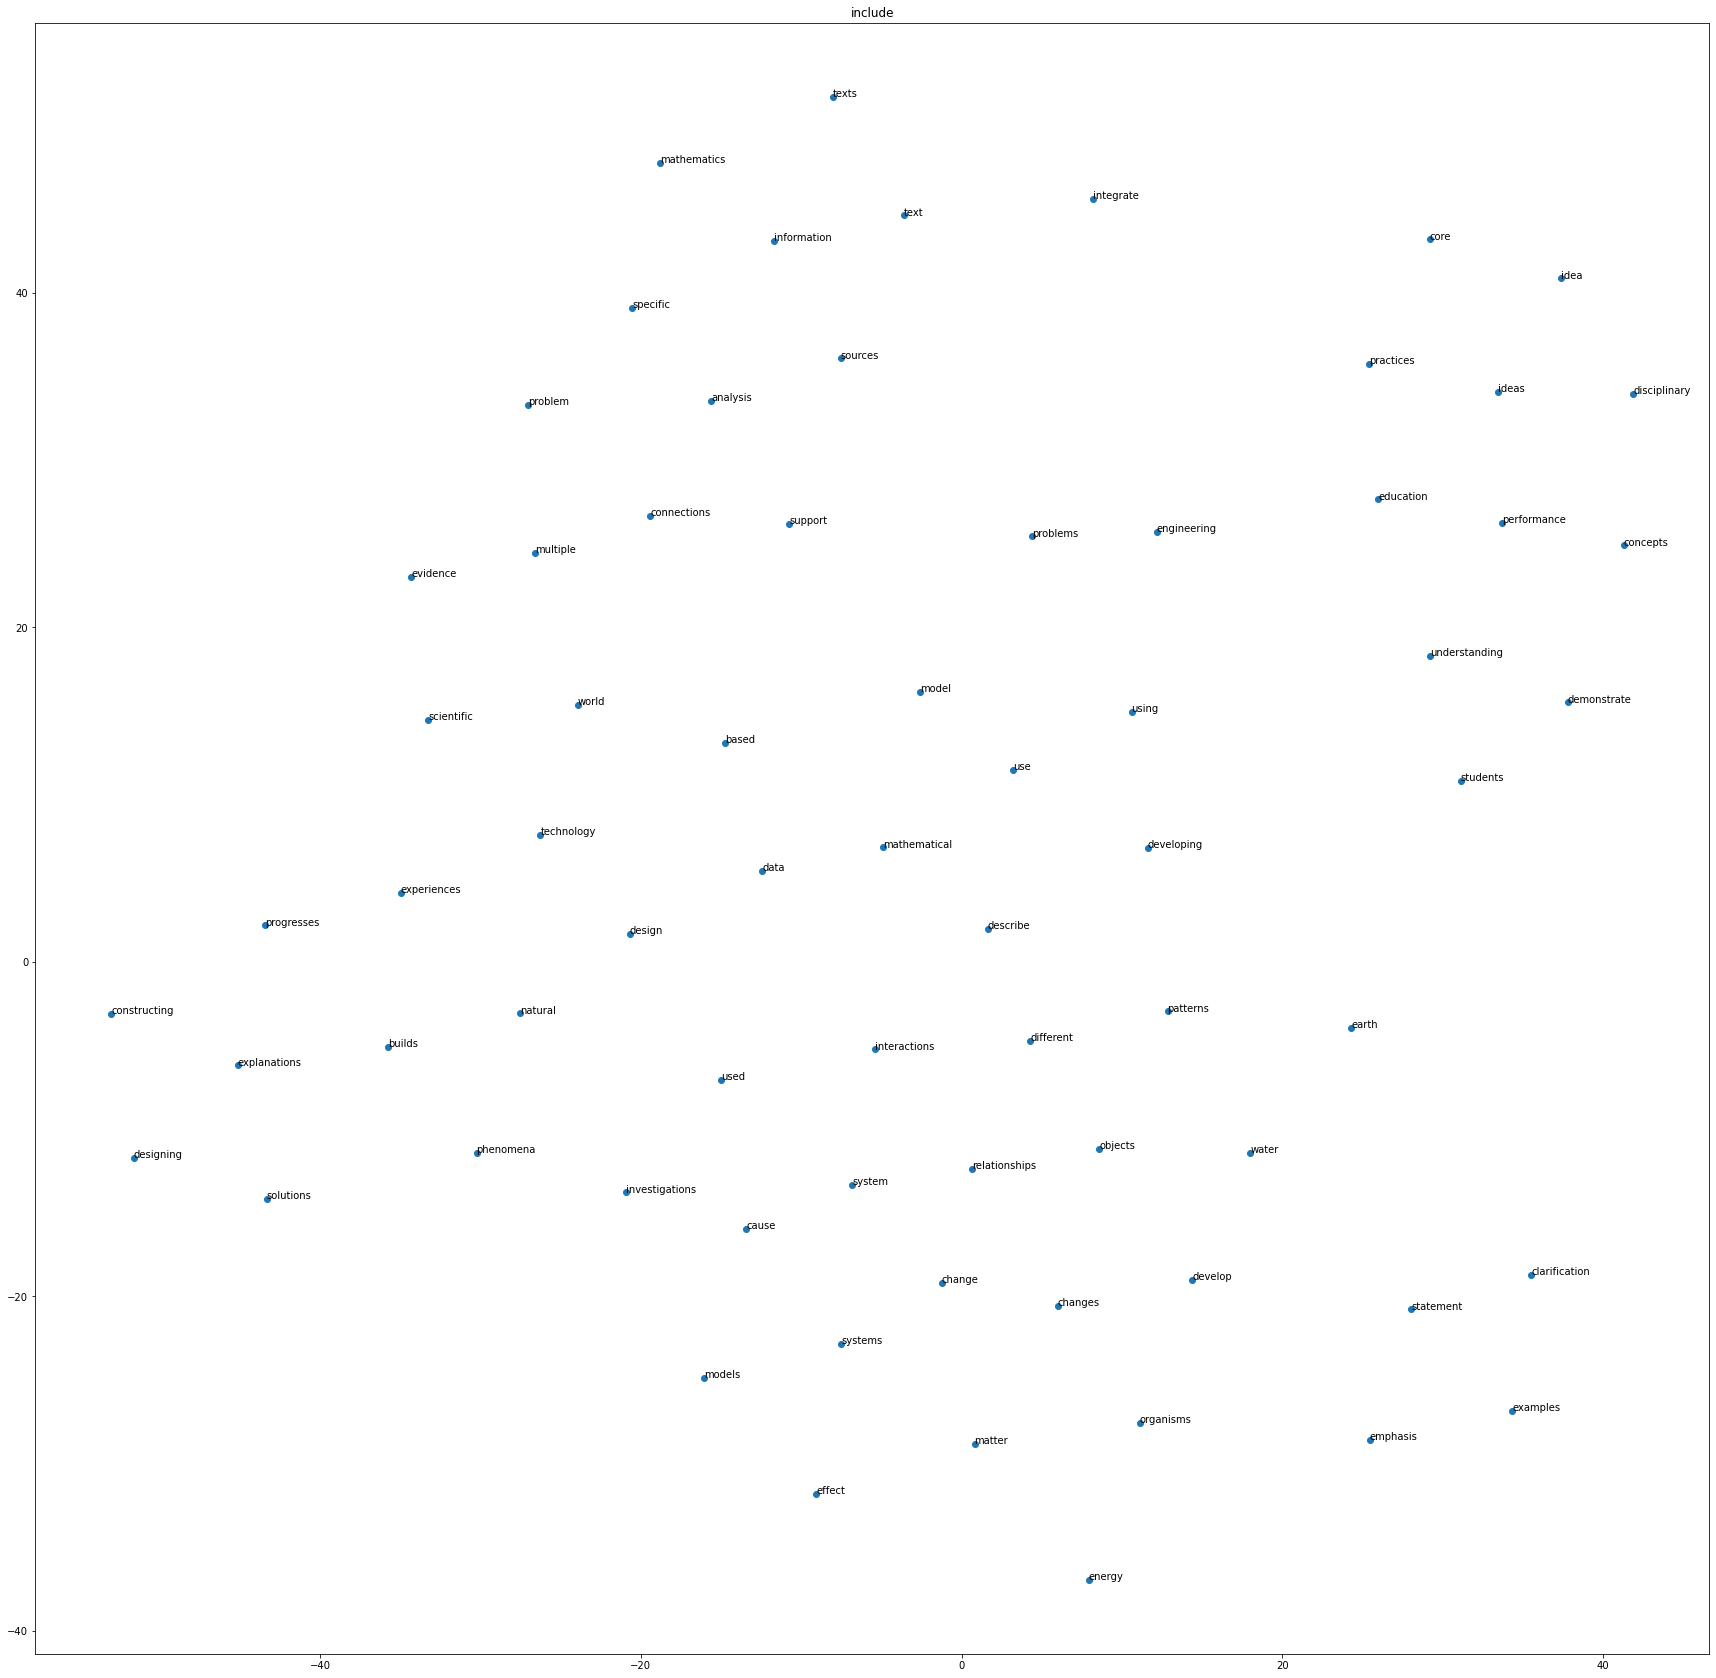

In [142]:
#examine top 10 most similar words 
top_5 = ['evidence', 'core', 'ideas', 'energy','include'] 

for word in top_5: 
    similars = model.wv.similar_by_word(word, topn=10)
    print(word, similars, "\n") 
    
#visualize the density of word relationships
for word in top_5: 
    selected_words = [w[0] for w in model.wv.most_similar(positive=[word], 
                                                          topn=100)]
    embeddings = [model.wv[w] for w in selected_words]

    mapped_embeddings = TSNE(n_components=2, metric='cosine', 
                             init='pca').fit_transform(embeddings) 

    plt.figure(figsize=(30,30)) 
    plt.title(word)
    x = mapped_embeddings[:,0]
    y = mapped_embeddings[:,1]
    plt.scatter(x, y)

    for i, txt in enumerate(selected_words):
        plt.annotate(txt, (x[i], y[i]))

In [165]:
#examine top 10 most dissimilar words 
for word in top_5:  
    dissimilars = model.wv.most_similar(negative=[word])
    #similars = model.wv.similar_by_word(negative = [word], topn=10)
    print(word, dissimilars, "\n") 
    

evidence [('practices', -0.997668445110321), ('core', -0.9978344440460205), ('disciplinary', -0.9978399276733398), ('examples', -0.9978604316711426), ('education', -0.9980415105819702), ('ideas', -0.9982017278671265), ('clarification', -0.998243510723114), ('statement', -0.998307466506958), ('concepts', -0.9983876347541809), ('idea', -0.9983899593353271)] 

core [('constructing', -0.9964674115180969), ('solutions', -0.9965080618858337), ('explanations', -0.9967190623283386), ('designing', -0.9967694878578186), ('progresses', -0.9969766736030579), ('examples', -0.9971117377281189), ('statement', -0.9972847104072571), ('energy', -0.9972935318946838), ('builds', -0.9973790645599365), ('phenomena', -0.9974310994148254)] 

ideas [('constructing', -0.996980607509613), ('solutions', -0.9969945549964905), ('explanations', -0.9972177743911743), ('designing', -0.9972787499427795), ('progresses', -0.9974521398544312), ('examples', -0.9976429343223572), ('builds', -0.9978257417678833), ('statement

This follows intuitive and domain knowledge of word associations. The most similar words in to evidence are - based, scientific, multiple, connections, data, analysis, support, world, specific, problem. The scorings on the dissimilar words are a little less intuitive and do not seem to shed any immediate light onto the text.

# State Standards 
The U.S. educational system is decentralized, with each state allowed to create their own standards and metrics for student learning. Thus each state's corpus of standards is unique. All states that have not fully adopted the NGSS standards are represented below. 

## Text Processing 
Each state's standards have been converted to txt file and will be cleaned generically but treated and processed individually. The same functions and process applied to the NGSS standard are applied below. 

In [168]:
us_states = ['maine', 'michigan', 'northcarolina', 'ohio', 'pennsylvania',
             'texas', 'virginia', 'alabama', 'alaska', 'arizona', 'colorado',
             'flordia', 'georgia.txt', 'idaho', 'louisiana', 'mass',
             'minnesota', 'mississippi', 'missouri', 'montana', 'nebraksa',
             'northdakota', 'oklahoma', 'southcarolina', 'southdakota', 
             'tennessee', 'utah', 'wisconsin', 'wyoming', 'virginia'] 

Maine [('performance', 425), ('use', 339), ('indicators', 295), ('learning', 277), ('state', 265), ('examples', 259), ('results', 255), ('essential', 245), ('instruction', 243), ('include', 237)]


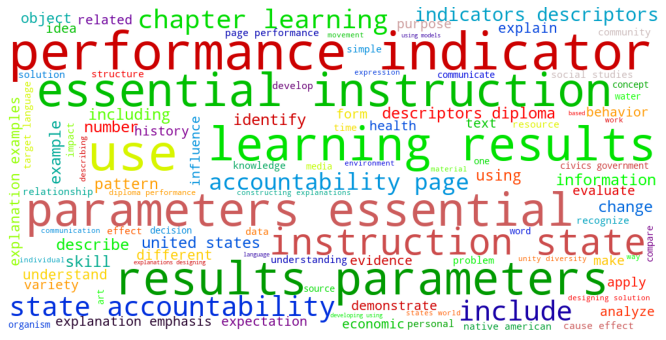

Michigan [('evidence', 67), ('specific', 66), ('performance', 58), ('energy', 56), ('use', 53), ('model', 51), ('engineering', 47), ('develop', 44), ('local', 43), ('earth', 43)]


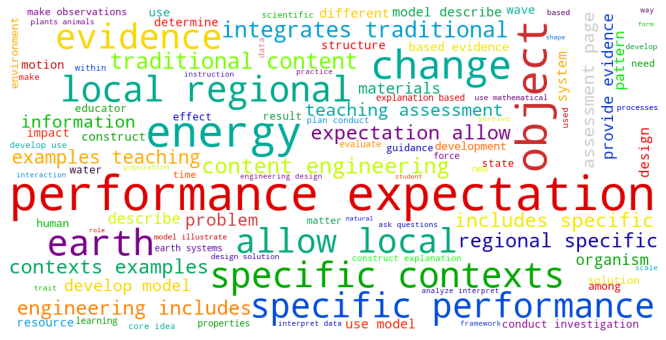

Northcarolina [('know', 329), ('energy', 291), ('water', 289), ('organisms', 187), ('earth', 163), ('understand', 146), ('unpacked', 138), ('content', 138), ('air', 121), ('food', 121)]


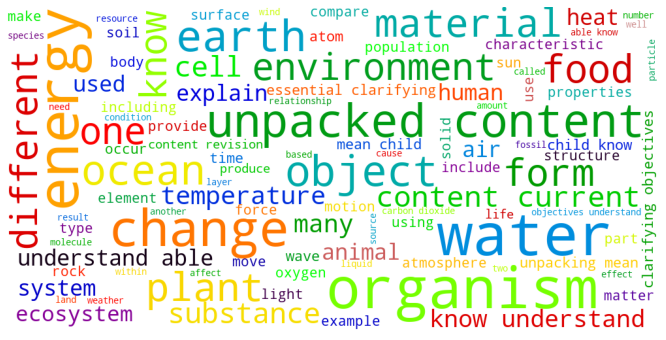

Ohio [('energy', 1103), ('concepts', 943), ('learning', 542), ('using', 522), ('earth', 516), ('data', 503), ('scientific', 472), ('knowledge', 453), ('water', 451), ('content', 442)]


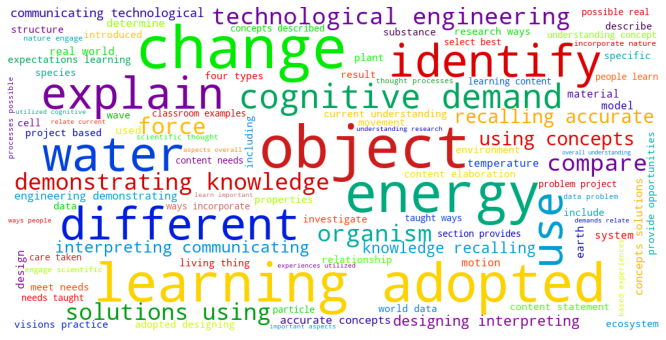

Pennsylvania [('describe', 124), ('identify', 117), ('apply', 111), ('explain', 106), ('technology', 104), ('systems', 83), ('knowledge', 70), ('use', 64), ('problems', 60), ('analyze', 58)]


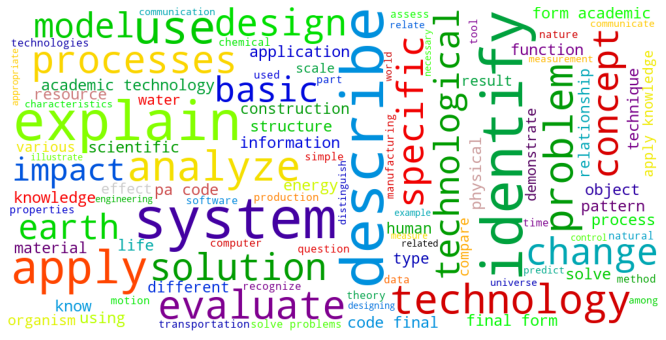

Texas [('student', 382), ('scientific', 307), ('including', 198), ('expected', 186), ('energy', 170), ('using', 141), ('natural', 139), ('investigations', 135), ('knows', 123), ('organisms', 121)]


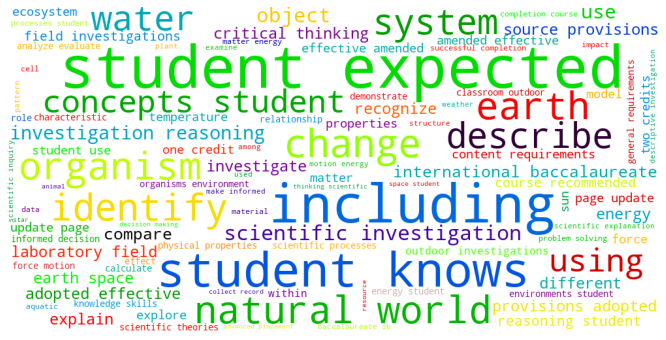

Virginia [('concepts', 145), ('student', 139), ('include', 123), ('investigate', 122), ('key', 121), ('understand', 118), ('scientific', 78), ('earth', 64), ('energy', 63), ('nature', 62)]


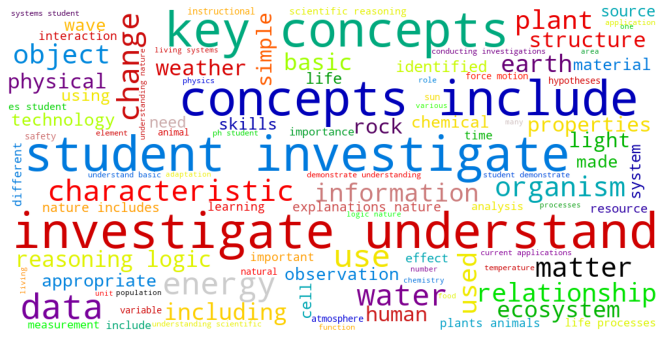

Alabama [('scientific', 163), ('course', 142), ('earth', 142), ('use', 141), ('core', 129), ('engineering', 127), ('information', 123), ('study', 121), ('education', 117), ('ideas', 116)]


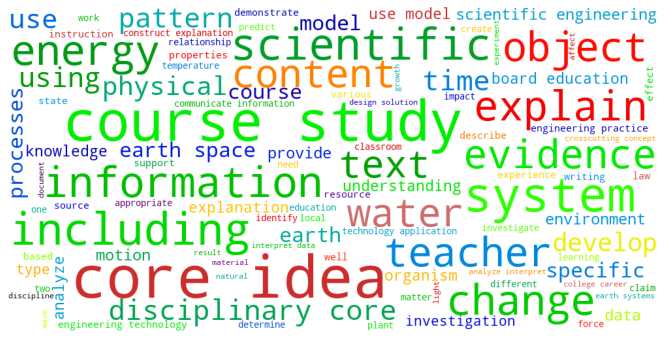

Alaska [('energy', 546), ('assessment', 534), ('include', 524), ('evidence', 431), ('engineering', 418), ('using', 402), ('understanding', 381), ('statement', 367), ('examples', 362), ('clarification', 361)]


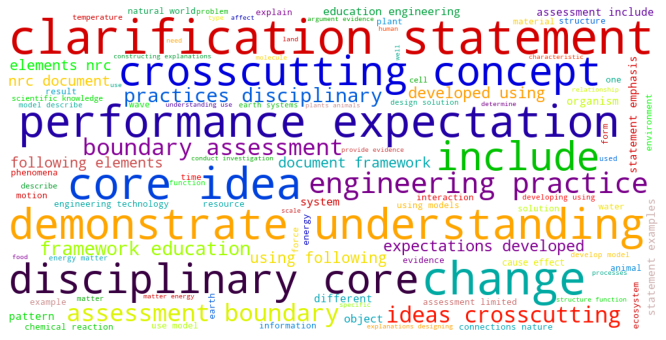

Arizona [('energy', 122), ('earth', 101), ('concepts', 89), ('use', 85), ('information', 85), ('crosscutting', 77), ('education', 74), ('understanding', 72), ('models', 72), ('system', 70)]


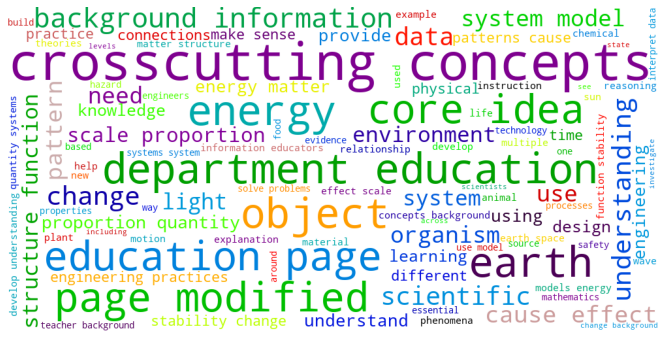

Colorado [('evidence', 453), ('energy', 417), ('natural', 375), ('earth', 355), ('statement', 325), ('engineering', 321), ('use', 301), ('academic', 294), ('include', 266), ('practices', 262)]


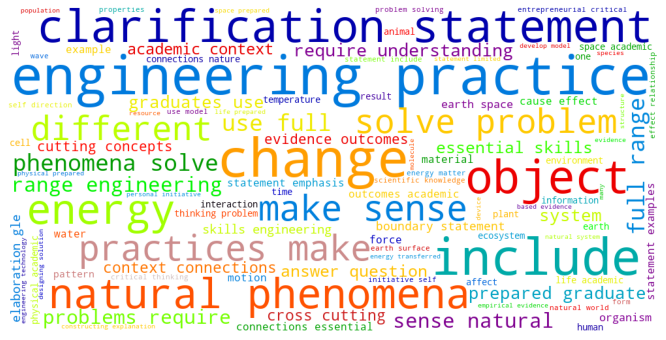

Flordia [('moderate', 1456), ('recognize', 1288), ('scientific', 1222), ('identify', 1191), ('describe', 866), ('explain', 782), ('energy', 551), ('knowledge', 453), ('pa', 430), ('including', 426)]


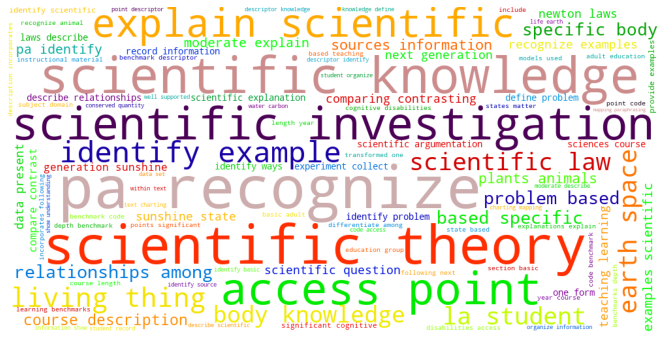

Georgia.Txt [('information', 85), ('excellence', 74), ('communicate', 71), ('use', 66), ('evaluate', 66), ('clarification', 62), ('statement', 62), ('obtain', 60), ('construct', 58), ('develop', 50)]


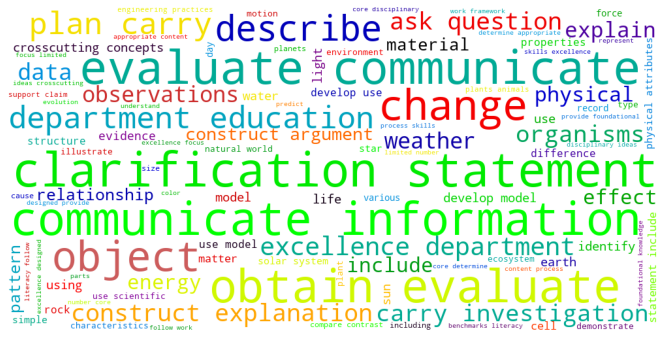

Idaho [('evidence', 453), ('energy', 417), ('natural', 375), ('earth', 355), ('statement', 325), ('engineering', 321), ('use', 301), ('academic', 294), ('include', 266), ('practices', 262)]


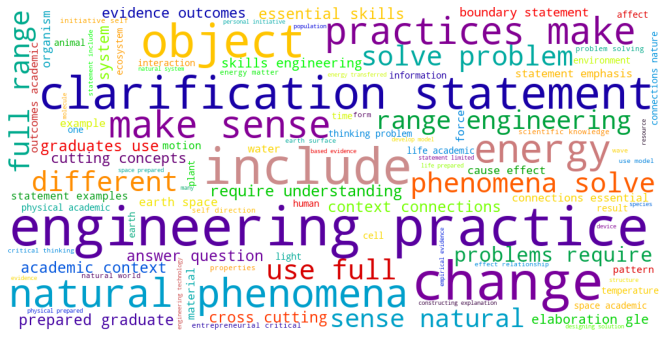

Louisiana [('evidence', 905), ('energy', 783), ('using', 753), ('data', 744), ('information', 626), ('problems', 558), ('solutions', 545), ('models', 542), ('use', 510), ('explanations', 447)]


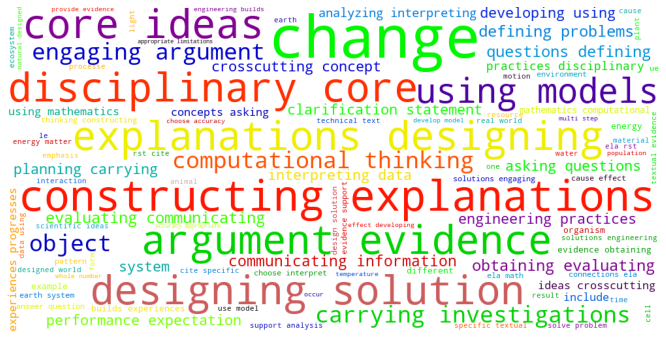

Mass [('engineering', 514), ('use', 315), ('technology', 311), ('practices', 304), ('include', 278), ('massachusetts', 272), ('energy', 265), ('evidence', 256), ('framework', 253), ('state', 245)]


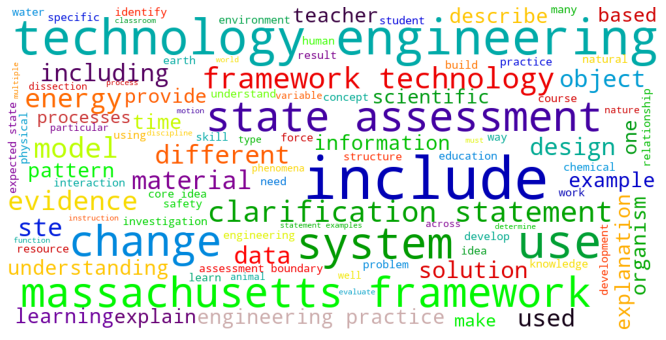

Minnesota [('engineering', 514), ('use', 315), ('technology', 311), ('practices', 304), ('include', 278), ('massachusetts', 272), ('energy', 265), ('evidence', 256), ('framework', 253), ('state', 245)]


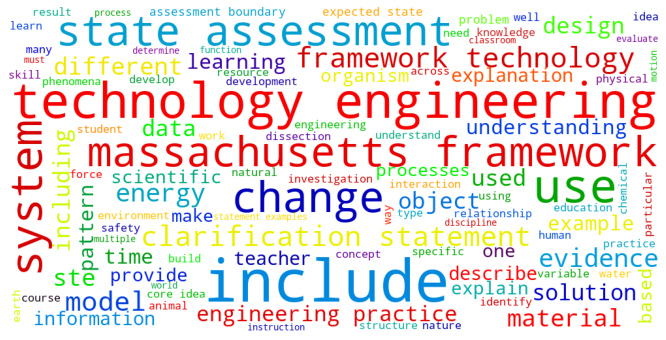

Mississippi [('engineering', 514), ('use', 315), ('technology', 311), ('practices', 304), ('include', 278), ('massachusetts', 272), ('energy', 265), ('evidence', 256), ('framework', 253), ('state', 245)]


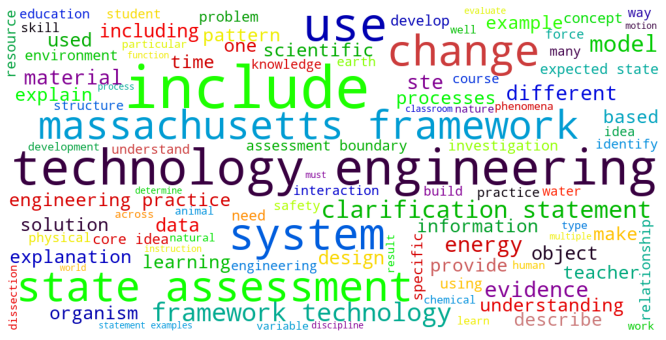

Missouri [('clarification', 146), ('statement', 146), ('examples', 135), ('include', 128), ('could', 101), ('energy', 94), ('evidence', 82), ('emphasis', 75), ('earth', 69), ('model', 57)]


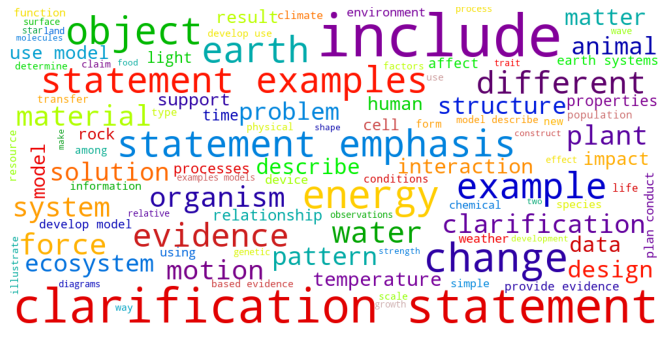

Montana [('engineering', 514), ('use', 315), ('technology', 311), ('practices', 304), ('include', 278), ('massachusetts', 272), ('energy', 265), ('evidence', 256), ('framework', 253), ('state', 245)]


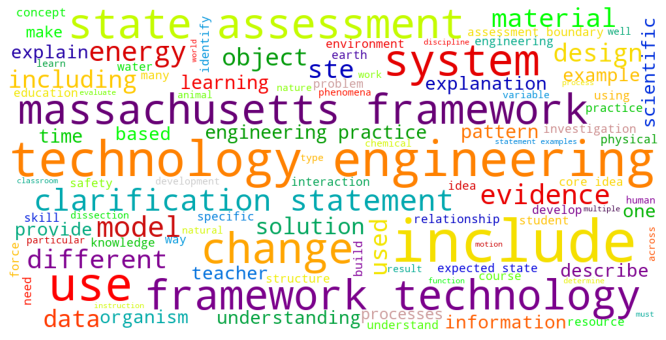

Nebraksa [('describe', 84), ('earth', 73), ('scientific', 70), ('recognize', 55), ('energy', 52), ('identify', 41), ('matter', 34), ('processes', 31), ('motion', 27), ('changes', 26)]


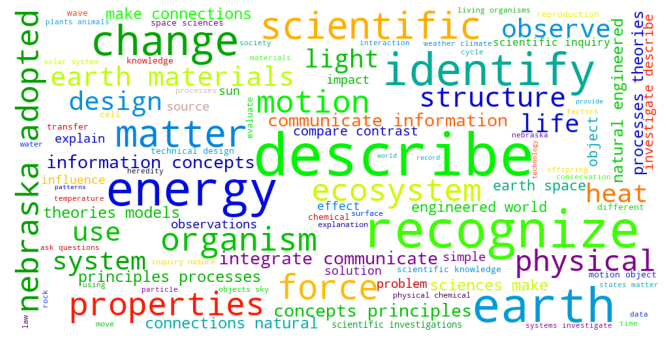

Northdakota [('evidence', 549), ('energy', 459), ('information', 457), ('using', 402), ('data', 390), ('nd', 348), ('assessment', 348), ('performance', 337), ('engineering', 336), ('earth', 332)]


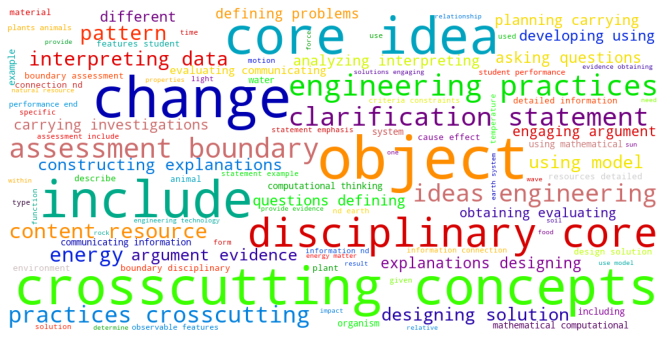

Oklahoma [('energy', 472), ('assessment', 412), ('include', 354), ('evidence', 322), ('ideas', 264), ('engineering', 261), ('core', 241), ('concepts', 239), ('system', 237), ('boundary', 236)]


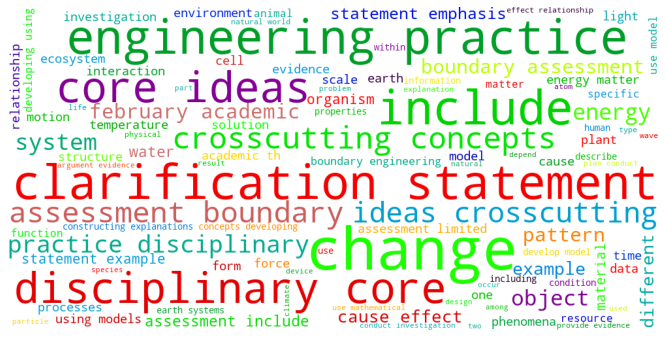

Southcarolina [('understanding', 312), ('use', 252), ('scientific', 246), ('demonstrate', 216), ('indicators', 202), ('performance', 188), ('energy', 181), ('earth', 180), ('data', 178), ('practices', 172)]


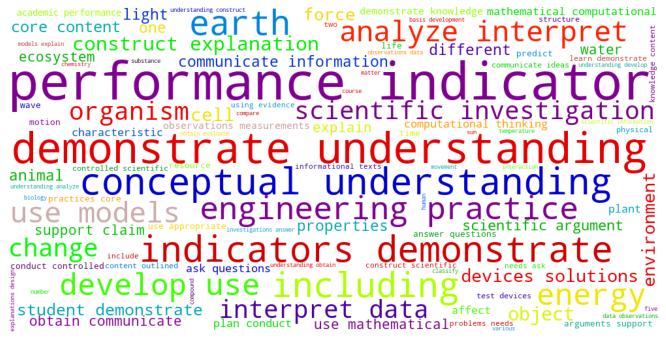

Southdakota [('energy', 141), ('earth', 104), ('evidence', 78), ('matter', 74), ('patterns', 69), ('cause', 65), ('effect', 64), ('use', 58), ('systems', 54), ('change', 48)]


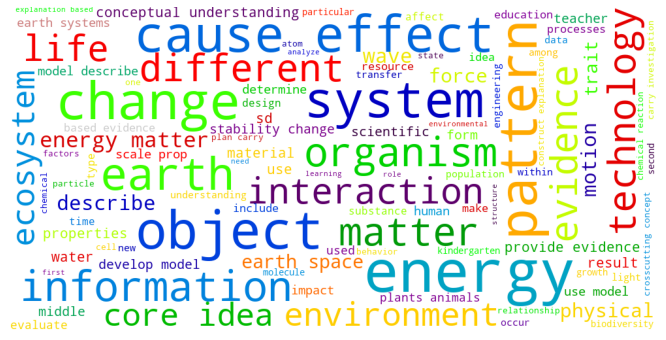

Tennessee [('energy', 241), ('earth', 198), ('use', 179), ('engineering', 174), ('scientific', 162), ('knowledge', 154), ('practices', 144), ('information', 129), ('explain', 127), ('data', 120)]


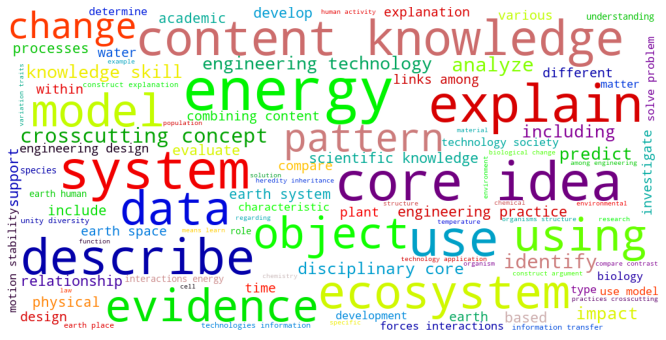

Utah [('energy', 210), ('include', 187), ('could', 182), ('examples', 179), ('emphasize', 151), ('seed', 134), ('earth', 132), ('education', 126), ('engineering', 116), ('matter', 115)]


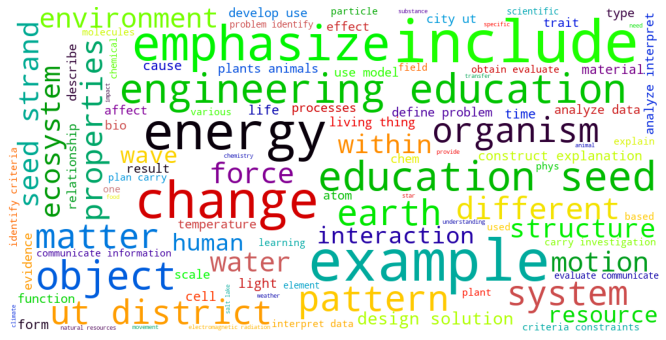

Wisconsin [('use', 206), ('engineering', 190), ('evidence', 176), ('learning', 136), ('energy', 133), ('ideas', 128), ('performance', 127), ('make', 126), ('design', 122), ('problems', 112)]


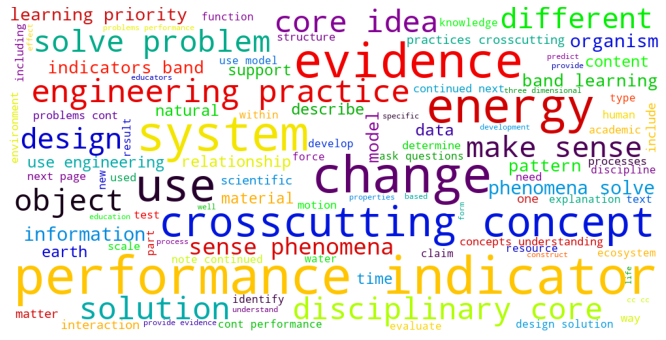

Wyoming [('extended', 396), ('benchmarks', 364), ('identify', 299), ('energy', 272), ('performance', 251), ('ses', 232), ('model', 222), ('examples', 195), ('include', 190), ('statement', 189)]


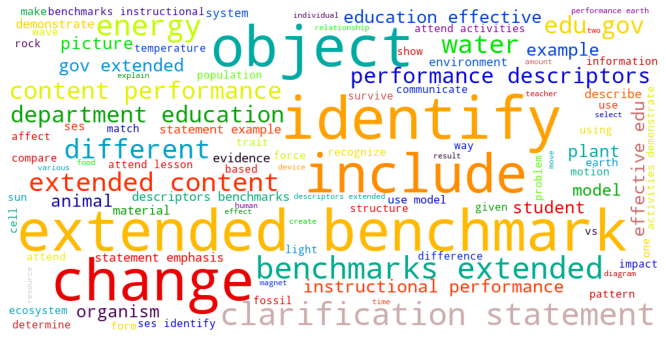

Virginia [('concepts', 145), ('student', 139), ('include', 123), ('investigate', 122), ('key', 121), ('understand', 118), ('scientific', 78), ('earth', 64), ('energy', 63), ('nature', 62)]


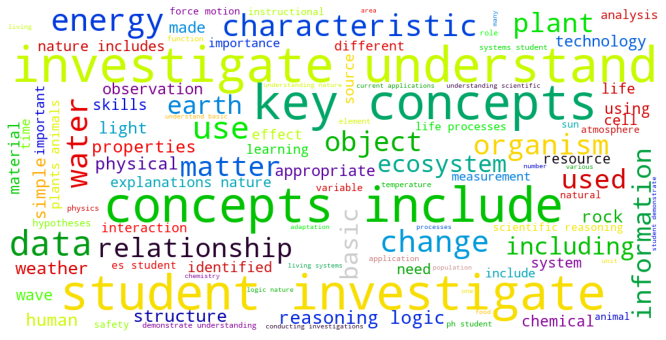

In [327]:
#create frequency list and word cloud for each state 
cleaned_words = [] 
top_words = []

for state_name in us_states: 
    state = open_and_flatten(state_name) 
    cleaned_words.append([state_name, state])
    #look at the top 50 words on general process ngss  
    generalclean_freqdist = FreqDist(state)  
    print(f"{state_name.title()} {generalclean_freqdist.most_common(10)}") 
    top_words.append([state_name, generalclean_freqdist.most_common(10)])
    word_cloud(state)  

There are definitely patterns that can be identified in the word frequencies and word clouds that align with generally what you would expect. Future work would include going through each state's corpus extensively to clean them individually. However effort has been put forth to remove any administrative or superfluous words that appear in a state's most frequently occurring word list. A complete list of those words can be seen in the projectfunctions.py file within the open_and_flatten function. 

## Word Relationships 
For each state's standards, examine the word relationships within the corpus. 

In [267]:
#aligned bigram pairs and pmi pairs for each state
for state_name in us_states:  
    state = open_and_flatten(state_name) 
    print(f"{state_name.title()} \n Bigrams: {bigram_generator(state, 10)} \
    \n\n PMI: {pmi_generator(state, 50)} \n\n")

Maine 
 Bigrams: [(('performance', 'indicators'), 0.007098986998484486), (('learning', 'results'), 0.006354523942463641), (('parameters', 'essential'), 0.006141820212171971), (('essential', 'instruction'), 0.006115232245885512), (('instruction', 'state'), 0.006115232245885512), (('results', 'parameters'), 0.006115232245885512), (('state', 'accountability'), 0.006115232245885512), (('chapter', 'learning'), 0.006008880380739677), (('accountability', 'page'), 0.0059822924144532184), (('indicators', 'descriptors'), 0.005450533088724043)]     

 PMI: [(('social', 'studies'), 8.594172478919383), (('cause', 'effect'), 8.423766321711746), (('civics', 'government'), 8.351207345927424), (('united', 'states'), 7.684801158586984), (('pre', 'diploma'), 7.502032210647419), (('accountability', 'page'), 7.328502325181317), (('target', 'language'), 7.287716710334816), (('parameters', 'essential'), 7.262229105762151), (('explanation', 'emphasis'), 7.257952866867328), (('descriptors', 'pre'), 7.228047803

Texas 
 Bigrams: [(('student', 'expected'), 0.010374607447285779), (('student', 'knows'), 0.006673396141767609), (('natural', 'world'), 0.0038694481830417226), (('concepts', 'student'), 0.0029161058770749214), (('international', 'baccalaureate'), 0.00246747420367878), (('investigation', 'reasoning'), 0.00246747420367878), (('scientific', 'investigation'), 0.002411395244504262), (('earth', 'space'), 0.0022431583669807087), (('adopted', 'effective'), 0.002187079407806191), (('provisions', 'adopted'), 0.002187079407806191)]     

 PMI: [(('natural', 'world'), 6.941839283872103), (('student', 'expected'), 5.536974722632284), (('student', 'knows'), 5.497055331192708), (('concepts', 'student'), 5.136667334586926)] 


Virginia 
 Bigrams: [(('investigate', 'understand'), 0.015903482314230874), (('key', 'concepts'), 0.015766383328763366), (('concepts', 'include'), 0.01562928434329586), (('student', 'investigate'), 0.015492185357828352), (('reasoning', 'logic'), 0.003016177680285166), (('explana

Idaho 
 Bigrams: [(('engineering', 'practices'), 0.0076986027339132545), (('clarification', 'statement'), 0.005425393265238081), (('academic', 'standards'), 0.005243536507744067), (('standards', 'sc'), 0.00494044191192071), (('natural', 'phenomena'), 0.004546418937350347), (('practices', 'make'), 0.00424332434152699), (('make', 'sense'), 0.004213014881944655), (('phenomena', 'solve'), 0.004091777043615312), (('full', 'range'), 0.0040614675840329765), (('problems', 'require'), 0.0040614675840329765)]     

 PMI: [(('cross', 'cutting'), 8.10287986808378), (('elaboration', 'gle'), 8.067357839998586), (('entrepreneurial', 'critical'), 8.032592421837911), (('prepared', 'graduates'), 8.02109678300008), (('answer', 'question'), 8.001443723267247), (('thinking', 'problem'), 7.979153162876452), (('cutting', 'concepts'), 7.975329818363269), (('essential', 'skills'), 7.872368821587894), (('full', 'range'), 7.80041897970888), (('problems', 'require'), 7.671618244209846), (('solve', 'problems'), 7.

Minnesota 
 Bigrams: [(('technology', 'engineering'), 0.006830052229811169), (('state', 'assessment'), 0.004896544797107272), (('framework', 'technology'), 0.004745881880273202), (('massachusetts', 'framework'), 0.004745881880273202), (('clarification', 'statement'), 0.002385496183206107), (('clarification', 'statements'), 0.0023352752109280835), (('engineering', 'practices'), 0.0023352752109280835), (('assessment', 'boundary'), 0.002033949377259944), (('expected', 'state'), 0.002033949377259944), (('could', 'include'), 0.0017075130574527922)]     

 PMI: [(('core', 'ideas'), 7.6494517003389735), (('clarification', 'statements'), 7.628910281788384), (('clarification', 'statement'), 7.616538357119417), (('assessment', 'boundary'), 7.546640894755196), (('state', 'assessment'), 7.217333269502237), (('could', 'include'), 7.001944770064281), (('expected', 'state'), 6.916378254086164), (('statement', 'examples'), 6.773555874782339), (('massachusetts', 'framework'), 6.77313652325746), (('fram

Southdakota 
 Bigrams: [(('sep', 'dci'), 0.02566202566202566), (('dci', 'ccc'), 0.025389025389025387), (('cause', 'effect'), 0.007917007917007918), (('ccc', 'cause'), 0.0075075075075075074), (('ccc', 'patterns'), 0.004914004914004914), (('energy', 'matter'), 0.004231504231504231), (('ccc', 'energy'), 0.0036855036855036856), (('core', 'ideas'), 0.0034125034125034124), (('earth', 'space'), 0.0034125034125034124), (('ccc', 'systems'), 0.003276003276003276)]     

 PMI: [(('cause', 'effect'), 6.674423167807676), (('sep', 'dci'), 5.2536876207243015), (('dci', 'ccc'), 5.238257580154697), (('ccc', 'cause'), 5.027946277873816)] 


Tennessee 
 Bigrams: [(('academic', 'standards'), 0.004537908135030438), (('content', 'knowledge'), 0.004039845047039292), (('crosscutting', 'concepts'), 0.0028223574986164916), (('core', 'ideas'), 0.0027116768123962368), (('engineering', 'technology'), 0.0027116768123962368), (('disciplinary', 'core'), 0.002379634753735473), (('engineering', 'practices'), 0.00232429

Examining these results it is clear how different the documents are. At a standard threshold (bigram 10/ pmi 50) each document some states have a large number of word associations while others have none. Future work would include exploring those states that have not returned and states and what that says about the document.  For this project I will highlight one unaligned state - Texas and one aligned state - Arizona to detail in length during my presentation, below are the gensim model word embeddings for each of their top five words. Future work would include sentiment analysis such as demonstrated below on all state's standards.

In [363]:
#texas   
texas = cleaned_words[5][1]

#word ebeddings 
texas_model = gensim.models.Word2Vec([texas], min_count=100, window=5, 
                               size=150) 

#examine top 10 most similar words  
texas_top_5 = ['student', 'scientific', 'including', 'expected','energy'] 

for word in texas_top_5: 
    similars = texas_model.wv.similar_by_word(word, topn=10)
    print(word, similars, "\n") 

student [('investigations', 0.9998608827590942), ('including', 0.9998581409454346), ('expected', 0.9998542070388794), ('scientific', 0.999843418598175), ('use', 0.9998376369476318), ('using', 0.9997966885566711), ('natural', 0.9997894763946533), ('energy', 0.9997873306274414), ('organisms', 0.9997836351394653), ('knows', 0.9997832179069519)] 

scientific [('use', 0.9998639225959778), ('investigations', 0.999856173992157), ('including', 0.9998514652252197), ('student', 0.999843418598175), ('expected', 0.999823808670044), ('natural', 0.9998101592063904), ('energy', 0.9997984766960144), ('systems', 0.9997921586036682), ('organisms', 0.9997566938400269), ('using', 0.9997519254684448)] 

including [('student', 0.9998581409454346), ('use', 0.999857485294342), ('expected', 0.9998515844345093), ('scientific', 0.9998514652252197), ('investigations', 0.9998412728309631), ('natural', 0.9997995495796204), ('systems', 0.9997967481613159), ('knows', 0.9997948408126831), ('organisms', 0.9997918605804

In [357]:
#alaska
alaska = cleaned_words[8][1]

#word ebeddings 
alaska_model = gensim.models.Word2Vec([alaska], min_count=100, window=5, 
                               size=150) 

#examine top 10 most similar words  
alaska_top_5 = ['energy', 'assessment', 'include', 'evidence', 'engineering'] 

for word in alaska_top_5: 
    similars = alaska_model.wv.similar_by_word(word, topn=10)
    print(word, similars, "\n") 

energy [('model', 0.9991917610168457), ('demonstrate', 0.9991781115531921), ('changes', 0.999074399471283), ('evidence', 0.9989804029464722), ('understanding', 0.9989200830459595), ('objects', 0.9987146258354187), ('different', 0.9985966086387634), ('resources', 0.998273491859436), ('organisms', 0.9982548952102661), ('describe', 0.9982325434684753)] 

assessment [('boundary', 0.9988413453102112), ('limited', 0.9975969195365906), ('include', 0.9975501894950867), ('could', 0.9956299662590027), ('different', 0.9942731857299805), ('water', 0.9942657351493835), ('examples', 0.9939980506896973), ('materials', 0.9938848614692688), ('clarification', 0.9932931065559387), ('chemical', 0.9927945137023926)] 

include [('could', 0.9994408488273621), ('examples', 0.9988292455673218), ('boundary', 0.9985934495925903), ('clarification', 0.9978316426277161), ('emphasis', 0.9976922273635864), ('assessment', 0.9975501894950867), ('statement', 0.996736466884613), ('different', 0.9946932196617126), ('chang

In the non aligned standards (Texas) none of the most frequently occuring words are in the top 5 for NGSS high frequency. In the aligned example (Alaska) both 'evidence' and 'energy' appear in both top 5 lists. The words evidence is most positively correlated to in the NGSS and Alaska state standards do not align nor do those in energy. This might indicate that while frequency is a good metric across texts the word associations are only meaningful when looking for sentiment analysis within text.

# Comparing Word Patterns Across Documents 
Examine the highest frequency words from each of the standards corpus to identify any patterns and which words are most prevalent across all standards. 

In [289]:
ngss_top10

[('evidence', 467),
 ('core', 438),
 ('ideas', 415),
 ('energy', 389),
 ('include', 305),
 ('using', 304),
 ('information', 302),
 ('engineering', 299),
 ('use', 296),
 ('data', 292)]

In [333]:
#create a df of the top 10 words for each state 
freq_words = pd.DataFrame(top_words, columns = ['Standards', 'Top10']) 

#explode the nested list & transpose df  
words = freq_words['Top10'].apply(pd.Series)
words = words.rename(columns = lambda x : 'word_' + str(x))  

#join and transpose
word_df = pd.concat([freq_words[:], words[:]], axis=1).T

#reset column index
word_df = word_df.rename(columns=word_df.iloc[0]).drop(word_df.index[0]).T 
word_df

Top10  \
maine          [(performance, 425), (use, 339), (indicators, ...   
michigan       [(evidence, 67), (specific, 66), (performance,...   
northcarolina  [(know, 329), (energy, 291), (water, 289), (or...   
ohio           [(energy, 1103), (concepts, 943), (learning, 5...   
pennsylvania   [(describe, 124), (identify, 117), (apply, 111...   
texas          [(student, 382), (scientific, 307), (including...   
virginia       [(concepts, 145), (student, 139), (include, 12...   
alabama        [(scientific, 163), (course, 142), (earth, 142...   
alaska         [(energy, 546), (assessment, 534), (include, 5...   
arizona        [(energy, 122), (earth, 101), (concepts, 89), ...   
colorado       [(evidence, 453), (energy, 417), (natural, 375...   
flordia        [(moderate, 1456), (recognize, 1288), (scienti...   
georgia.txt    [(information, 85), (excellence, 74), (communi...   
idaho          [(evidence, 453), (energy, 417), (natural, 375...   
louisiana      [(evidence, 905), (energy, 783), (using, 753),...   
mass           [(engineering, 514), (use, 315), (technology, ...   
minnesota      [(engineering, 514), (use, 315), (technology, ...   
mississippi    [(engineering, 514), (use, 315), (technology, ...   
missouri       [(clarification, 146), (statement, 146), (exam...   
montana        [(engineering, 514), (use, 315), (technology, ...   
nebraksa       [(describe, 84), (earth, 73), (scientific, 70)...   
northdakota    [(evidence, 549), (energy, 459), (information,...   
oklahoma       [(energy, 472), (assessment, 412), (include, 3...   
southcarolina  [(understanding, 312), (use, 252), (scientific...   
southdakota    [(energy, 141), (earth, 104), (evidence, 78), ...   
tennessee      [(energy, 241), (earth, 198), (use, 179), (eng...   
utah           [(energy, 210), (include, 187), (could, 182), ...   
wisconsin      [(use, 206), (engineering, 190), (evidence, 17...   
wyoming        [(extended, 396), (benchmarks, 364), (identify...   
virginia       [(concepts, 145), (student, 139), (include, 12...   

                             word_0              word_1              word_2  \
maine            (performance, 425)          (use, 339)   (indicators, 295)   
michigan             (evidence, 67)      (specific, 66)   (performance, 58)   
northcarolina           (know, 329)       (energy, 291)        (water, 289)   
ohio                 (energy, 1103)     (concepts, 943)     (learning, 542)   
pennsylvania        (describe, 124)     (identify, 117)        (apply, 111)   
texas                (student, 382)   (scientific, 307)    (including, 198)   
virginia            (concepts, 145)      (student, 139)      (include, 123)   
alabama           (scientific, 163)       (course, 142)        (earth, 142)   
alaska                (energy, 546)   (assessment, 534)      (include, 524)   
arizona               (energy, 122)        (earth, 101)      (concepts, 89)   
colorado            (evidence, 453)       (energy, 417)      (natural, 375)   
flordia            (moderate, 1456)   (recognize, 1288)  (scientific, 1222)   
georgia.txt       (information, 85)    (excellence, 74)   (communicate, 71)   
idaho               (evidence, 453)       (energy, 417)      (natural, 375)   
louisiana           (evidence, 905)       (energy, 783)        (using, 753)   
mass             (engineering, 514)          (use, 315)   (technology, 311)   
minnesota        (engineering, 514)          (use, 315)   (technology, 311)   
mississippi      (engineering, 514)          (use, 315)   (technology, 311)   
missouri       (clarification, 146)    (statement, 146)     (examples, 135)   
montana          (engineering, 514)          (use, 315)   (technology, 311)   
nebraksa             (describe, 84)         (earth, 73)    (scientific, 70)   
northdakota         (evidence, 549)       (energy, 459)  (information, 457)   
oklahoma              (energy, 472)   (assessment, 412)      (include, 354)   
southcarolina  (understanding, 312)          (use, 252

In [329]:
#examine most frequently occuring word per state
print("Most Frequent Word") 
display(word_df.iloc[1])

Most Frequent Word


maine              (performance, 425)
michigan               (evidence, 67)
northcarolina             (know, 329)
ohio                   (energy, 1103)
pennsylvania          (describe, 124)
texas                  (student, 382)
virginia              (concepts, 145)
alabama             (scientific, 163)
alaska                  (energy, 546)
arizona                 (energy, 122)
colorado              (evidence, 453)
flordia              (moderate, 1456)
georgia.txt         (information, 85)
idaho                 (evidence, 453)
louisiana             (evidence, 905)
mass               (engineering, 514)
minnesota          (engineering, 514)
mississippi        (engineering, 514)
missouri         (clarification, 146)
montana            (engineering, 514)
nebraksa               (describe, 84)
northdakota           (evidence, 549)
oklahoma                (energy, 472)
southcarolina    (understanding, 312)
southdakota             (energy, 141)
tennessee               (energy, 241)
utah        

In [337]:
state_df

state update_year    standards two_letter
0          alabama        2015      aligned         AL
1          alaskas        2017      aligned         AK
2          arizona        2018      aligned         AZ
3         arkansas        2016      adopted         AR
4       california        2013      adopted         CA
5         colorado        2020      aligned         CO
6       conneticut        2015      adopted         CT
7         delaware        2016      adopted         DE
8          flordia        2008  independent         FL
9          georgia        2016      aligned         GA
10          hawaii        2016      adopted         HI
11           idaho        2018      aligned         ID
12        illinois        2014      adopted         IL
13         indiana        2016      aligned         IN
14            iowa        2015      adopted         IA
15          kansas        2013      adopted         KS
16        kentucky        2015      adopted         KY
17       louisiana       20202      aligned         LA
18           maine        2019  independent         ME
19        maryland        2013      adopted         MD
20   massachusetts        2016      aligned         MA
21        michigan        2015  independent         MI
22       minnesota        2019      aligned         MN
23     mississippi        2018      aligned         MS
24        missouri        2016      aligned         MO
25         montana        2016      aligned         MT
26        nebraska        2017      aligned         NE
27          nevada        2015      adopted         NV
28   new hampshire        2015      adopted         NH
29      new jersey        2020      adopted         NJ
30      new mexico        2003      adopted         NM
31        new york        2016      adopted         NY
32  north carolina        2004  independent         NC
33    north dakota        2019      aligned         ND
34            ohio        2019  independent         OH
35        oklahoma        2020      aligned         OK
36          oregon        2014      adopted         OR
37    pennsylvania        2002  independent         PA
38    rhode island        2013      adopted         RI
39  south carolina        2014      aligned         SC
40    south dakota        2016      aligned         SD
41       tennessee        2016      aligned         TN
42           texas        2017  independent         TX
43            utah        2019      aligned         UT
44         vermont        2013      adopted         VT
45        virginia        2018  independent         VA
46      washington        2013      adopted         WA
47   west virginia        2015      aligned         WV
48       wisconsin        2017      aligned         WI
49         wyoming        2017      aligned         WY

# Quantifying Alignment 
Using a wide variety of NLP techniques and similarity scores compare the standards from each state to that of the NGSS standards to begin building a measure for alignment. For the purposes of this project alignment will be defined by how similar two corpus are semantically. The theory behind this is that organizations that are aligned should describe a similar topic in similar ways i.e. the language a state that is aligned to the NGSS standards chooses to use should be similar to the language used to describe a specific standard or grade band.

## Gensim Similarity  
Use gensim similarity to compare whole text alignment between NGSS (set as index) and each of the state's standards. 

In [367]:
# Set the NGSS Index  
ngss_docs = []
with open ('ngs') as f:
    tokens = sent_tokenize(f.read())
    for line in tokens:
        ngss_docs.append(line)

#preprocess ngss file using the gensim model
processed_ngss = preprocess_documents(ngss_docs)

#create a ngss dictionary
ngss_dictionary = gensim.corpora.Dictionary(processed_ngss) 

#create the corpus 
ngss_corpus = [ngss_dictionary.doc2bow(processed_ngss) for processed_ngss in 
               processed_ngss] 

#set the index to ngss standards 
tf_idf = gensim.models.TfidfModel(ngss_corpus)
sims = gensim.similarities.Similarity('/Users/kristen/Flatiron/Capstone', 
                                      tf_idf[ngss_corpus], 
                                      num_features=len(ngss_dictionary))

Using a custom built function run a comparison of each state's standards, returning a rounded percentage score to indicate similarity of document (alignment). This is a sum of cosine similarity scores to the index that has been summed and divided by the length of that state's corpus.

In [371]:
for state in us_states:  
    compare_docs(state)

Maine Alignment: %19
Michigan Alignment: %27
Northcarolina Alignment: %23
Ohio Alignment: %16
Pennsylvania Alignment: %22
Texas Alignment: %32
Virginia Alignment: %26
Alabama Alignment: %16
Alaska Alignment: %23
Arizona Alignment: %27
Colorado Alignment: %14
Flordia Alignment: %17
Georgia.Txt Alignment: %31
Idaho Alignment: %14
Louisiana Alignment: %23
Mass Alignment: %18
Minnesota Alignment: %18
Mississippi Alignment: %18
Missouri Alignment: %29
Montana Alignment: %18
Nebraksa Alignment: %34
Northdakota Alignment: %15
Oklahoma Alignment: %24
Southcarolina Alignment: %21
Southdakota Alignment: %20
Tennessee Alignment: %24
Utah Alignment: %10
Wisconsin Alignment: %16
Wyoming Alignment: %13


Looking at this score nothing is above 40% which is not surprising 

### Clustering the Standard Documents

In [41]:
#all standards including ngss
all_docs = ['maine', 'michigan', 'northcarolina', 'ohio', 'pennsylvania',
             'texas', 'virginia', 'alabama', 'alaska', 'arizona', 'colorado',
             'flordia', 'georgia.txt', 'idaho', 'louisiana', 'mass', 
             'minnesota', 'mississippi', 'missouri', 'montana', 'nebraksa',
             'northdakota', 'oklahoma', 'southcarolina', 'southdakota', 
             'tennessee', 'utah', 'wisconsin', 'wyoming', 'ngs'] 

In [42]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(all_docs)

In [43]:
model = KMeans(n_clusters=7, init='k-means++', max_iter=200, n_init=10)
model.fit_predict(X)
labels=model.labels_
standard_cl=pd.DataFrame(list(zip(all_docs,labels)),columns=['states','cluster'])
print(standard_cl.sort_values(by=['cluster']))

           states  cluster
0           maine        0
27      wisconsin        0
26           utah        0
25      tennessee        0
24    southdakota        0
23  southcarolina        0
22       oklahoma        0
21    northdakota        0
20       nebraksa        0
18       missouri        0
17    mississippi        0
15           mass        0
28        wyoming        0
14      louisiana        0
12    georgia.txt        0
11        flordia        0
9         arizona        0
8          alaska        0
7         alabama        0
6        virginia        0
5           texas        0
4    pennsylvania        0
3            ohio        0
29            ngs        0
2   northcarolina        1
13          idaho        2
19        montana        3
1        michigan        4
16      minnesota        5
10       colorado        6


When I cluster the state PDFs the majority grouping is with NGSS standards and there are states that stick out of that correctly (ie independently developed standards) such as Virginia, and Michigan. But it does not ungroup other independently grouped variables 

### Word Mover's Distance 

In [96]:
from gensim.models import Word2Vec
               
filename = '/Users/kristen/Downloads/GoogleNews-vectors-negative300.bin.gz'
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(filename, binary=True)

In [97]:
word2vec_model.init_sims(replace=True)   

In [98]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.vocab]
    return np.mean(word2vec_model[doc], axis=0)

In [99]:
sentence_a = """Plan and conduct an investigation to describe and classify 
             different kinds of materials by their observable properties""" 

sentence_b = """Conduct an investigation to describe and classify various 
             substances according to physical properties"""

In [100]:
sentence_a = sentence_a.lower().split()
sentence_b = sentence_b.lower().split()

In [101]:
stop_words = stopwords.words('english')
sentence_a = [w for w in sentence_a if w not in stop_words]
sentence_b = [w for w in sentence_b if w not in stop_words]

In [102]:
word2vec_model.wmdistance(sentence_a, sentence_b)

0.5952981265197317

Winner winner chicken dinner!!

In [105]:
random_a = """For a quick examination of how word vectors work, check out 
           my previous article about them.""" 

random_b = """A sedated female platypus received a physical exam at the 
           Taronga Wildlife Hospital in Mosman New South Wales Australia."""


random_a = random_a.lower().split()
random_b = random_b.lower().split() 

stop_words = stopwords.words('english')
random_a = [w for w in random_a if w not in stop_words]
random_b = [w for w in random_b if w not in stop_words] 

word2vec_model.wmdistance(random_a, random_b)

1.2805050754945468

In [118]:
test = general_processing('arizona')

In [119]:
ngss_string = ' '.join(ngss_processed)
arizona_string = ' '.join(test)

In [120]:
word2vec_model.wmdistance(ngss_string, arizona_string)

0.030835354492651918

In [79]:
corpus = ['maine', 'michigan', 'northcarolina', 'ohio', 'pennsylvania',
             'texas', 'virginia', 'alabama', 'alaska', 'arizona', 'colorado',
             'flordia', 'georgia.txt', 'idaho', 'louisiana', 'mass', 
             'minnesota', 'mississippi', 'missouri', 'montana', 'nebraksa',
             'northdakota', 'oklahoma', 'southcarolina', 'southdakota', 
             'tennessee', 'utah', 'wisconsin', 'wyoming', 'ngs'] 

## Micro Modeling 

In [80]:
document_vector(word2vec_model, 'ngs')

array([-9.19506326e-02,  2.18096953e-02,  1.66033860e-02,  6.14091344e-02,
       -3.70349251e-02, -4.08064434e-03,  8.30879342e-03, -1.88114960e-02,
       -3.09019107e-02,  6.09764224e-03, -3.85382734e-02,  1.55398427e-02,
       -7.12269470e-02,  1.40862986e-02, -3.88500169e-02,  3.11505105e-02,
        1.67566296e-02,  6.33904934e-02, -4.79538143e-02,  3.38691846e-03,
       -7.64850304e-02,  2.85354611e-02,  1.30959572e-02, -1.14636971e-02,
       -4.61882204e-02,  3.64442579e-02, -7.38971457e-02,  7.29914382e-02,
       -2.56035458e-02,  2.56831273e-02,  3.24079953e-02,  1.13199055e-02,
       -3.85965151e-03, -3.44612971e-02, -8.02313685e-02,  6.79742321e-02,
       -7.83023760e-02,  6.09459467e-02, -2.22105328e-02,  4.60955091e-02,
       -5.12998812e-02, -4.08430099e-02,  4.82497849e-02,  7.69040808e-02,
        9.67460126e-03,  1.64039899e-02, -3.82771306e-02, -5.16330488e-02,
        2.01070867e-02,  7.80743212e-02, -4.40755673e-02,  9.50542316e-02,
       -2.62427106e-02,  

Measuring the similarity between a single standard represented as a string across states. Will more time and computational power this coudl be done for each standard. 

NGSS STANDARD: 2nd Grade Physical Science 
2-PS1-1 Matter and Its Interactions
Plan and conduct an investigation to describe and classify different kinds of materials by their observable properties.

In [50]:
from py_stringmatching import MongeElkan 

me = MongeElkan()
me.get_raw_score(['Plan', 'and', 'conduct', 'an', 'investigation', 'to', 
                  'describe', 'and', 'classify', 'different', 'kinds', 'of', 
                  'materials', 'by', 'their', 'observable properties'], 
                 ['Conduct', 'an', 'investigation', 'to', 'describe', 'and',
                  'classify', 'various', 'substances', 'according', 'to', 
                  'physical', 'properties'])

0.7991203740239143

In [54]:
from py_stringmatching import Levenshtein

lev = Levenshtein()

lev.get_sim_score('Plan and conduct an investigation to describe and classify different kinds of materials by their observable properties', 
                 'Conduct an investigation to describe and classify various substances according to physical properties')

0.576271186440678

In [53]:
from py_stringmatching import Jaccard

jac = Jaccard()
jac.get_raw_score(['Plan', 'and', 'conduct', 'an', 'investigation', 'to', 
                  'describe', 'and', 'classify', 'different', 'kinds', 'of', 
                  'materials', 'by', 'their', 'observable properties'], 
                 ['Conduct', 'an', 'investigation', 'to', 'describe', 'and',
                  'classify', 'various', 'substances', 'according', 'to', 
                  'physical', 'properties'])

0.2857142857142857

In [56]:
from py_stringmatching import BagDistance

bd = BagDistance()
bd.get_sim_score('Plan and conduct an investigation to describe and classify different kinds of materials by their observable properties', 
                 'Conduct an investigation to describe and classify various substances according to physical properties')

0.7627118644067796

### Fuzzy Wuzzy Text Matching

In [73]:
from fuzzywuzzy import fuzz

In [75]:
fuzz.ratio('Plan and conduct an investigation to describe and classify different kinds of materials by their observable properties', 
                 'Conduct an investigation to describe and classify various substances according to physical properties')

62

In [76]:
fuzz.partial_ratio('Plan and conduct an investigation to describe and classify different kinds of materials by their observable properties', 
                 'Conduct an investigation to describe and classify various substances according to physical properties')

56

In [77]:
fuzz.token_sort_ratio('Plan and conduct an investigation to describe and classify different kinds of materials by their observable properties', 
                 'Conduct an investigation to describe and classify various substances according to physical properties')

61

In [79]:
fuzz.ratio(ngss_processed, test)

1

In [ ]:
### Jacqard Similarity

In [89]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [91]:
get_jaccard_sim('Plan and conduct an investigation to describe and classify different kinds of materials by their observable properties', 'Conduct an investigation to describe and classify various substances according to physical properties')
#https://towardsdatascience.com/overview-of-text-similarity-metrics-3397c4601f50

0.3333333333333333

In [46]:
test

['chapter',
 'learning',
 'results',
 'parameters',
 'essential',
 'instruction',
 'state',
 'accountability',
 'page',
 'department',
 'education',
 'chapter',
 'learning',
 'results',
 'parameters',
 'essential',
 'instruction',
 'state',
 'accountability',
 'summary',
 'department',
 'education',
 'regulation',
 'learning',
 'results',
 'parameters',
 'essential',
 'instruction',
 'state',
 'accountability',
 'establishes',
 'parameters',
 'essential',
 'teaching',
 'learning',
 'grades',
 'pre',
 'kindergarten',
 'diploma',
 'across',
 'eight',
 'content',
 'areas',
 'supports',
 'goals',
 'outlined',
 'guiding',
 'principles',
 'learning',
 'results',
 'parameters',
 'essential',
 'instruction',
 'state',
 'accountability',
 'inform',
 'blueprint',
 'item',
 'development',
 'large',
 'scale',
 'state',
 'assessments',
 'aligned',
 'federal',
 'accountability',
 'standards',
 'found',
 'department',
 'education',
 'regulation',
 'federal',
 'state',
 'local',
 'accountability',
 's

In [45]:
ngss_processed

['topic',
 'arrangements',
 'next',
 'generation',
 'beginning',
 'ngss',
 'development',
 'process',
 'order',
 'eliminate',
 'potential',
 'redundancy',
 'seek',
 'appropriate',
 'grain',
 'size',
 'seek',
 'natural',
 'connections',
 'among',
 'disciplinary',
 'core',
 'ideas',
 'dcis',
 'identified',
 'within',
 'framework',
 'education',
 'writers',
 'arranged',
 'dcis',
 'topics',
 'around',
 'develop',
 'structure',
 'provided',
 'original',
 'basis',
 'preferred',
 'many',
 'states',
 'however',
 'coding',
 'structure',
 'individual',
 'performance',
 'reflects',
 'dci',
 'arrangement',
 'framework',
 'due',
 'fact',
 'ngss',
 'progress',
 'toward',
 'end',
 'high',
 'school',
 'core',
 'ideas',
 'may',
 'rearranged',
 'order',
 'within',
 'grade',
 'level',
 'table',
 'contents',
 'elementary',
 'introduction',
 'kindergarten',
 'storyline',
 'forces',
 'interactions',
 'pushes',
 'pulls',
 'interdependent',
 'relationships',
 'ecosystems',
 'animals',
 'plants',
 'environment

In [ ]:
cleaned_words = []
for state_name in us_states: 
    state = open_and_flatten(state_name) 
    cleaned_words.append([state_name, state])

# Appendix A: The Age of Science Standards by State (EDA) 
According to most DOE state websites standards are updated on a 5 year cycle. Some states update standards at a much higher rate than others. The dates below are the most current date I could find associated with the standards I am working with (as of January 2021). I am interested in seeing the distribution of states standard dates as well as how that breaks down between NGS adopted/ NGS aligned/ and Independent states.

In [323]:
#unpickle state dictionary
state_df = pd.read_pickle("./state_df.pkl") 
#transpose values
state_df = state_df.T 

In [324]:
#reset index
state_df.reset_index(inplace=True)

In [325]:
#set column name
state_df = state_df.rename(columns={'index': 'state'})   

two_letter = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 
 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 
 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
state_df['two_letter'] = two_letter 
state_df.head()

state update_year standards two_letter
0     alabama        2015   aligned         AL
1     alaskas        2017   aligned         AK
2     arizona        2018   aligned         AZ
3    arkansas        2016   adopted         AR
4  california        2013   adopted         CA

In [ ]:
#visualize the age of science standards 
grouped_df = state_df.groupby('update_year').count() 
grouped_df

In [ ]:
#graph the stat counts by year and alignment
fig = go.Figure() 

years= [2002, 2003, 2004, 2008, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] 

fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=[0, 0, 0, 0, 6, 2, 5, 4, 0, 0, 0, 1],
                name='NGSS Adopted States',
                marker_color='rgb(75, 117, 156)'
                ))
fig.add_trace(go.Bar(x=years,
                y=[0, 0, 0, 0, 0, 1, 2, 7, 4, 3, 3, 3],
                name='NGSS Aligned States',
                marker_color='rgb(26, 118, 255)'
                )) 
fig.add_trace(go.Bar(x=years,
                y=[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0],
                name='Independent Standards States',
                marker_color='rgb(135, 206, 235)'
                ))

fig.update_layout(
    title='Date of Science Standard Development by Standard Group',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Total Number of States',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
) 

fig.add_annotation(x=2002, y=1,
            text="Pennsylvania",
            showarrow=True,
            arrowhead=1) 

fig.add_annotation(x=2004, y=1,
            text="North Carolina",
            showarrow=True,
            arrowhead=1, 
            ax=-30,
            ay=-70) 

fig.add_annotation(x=2008, y=1,
            text="Flordia",
            showarrow=True,
            arrowhead=1)
fig.show()

NGSS standards were developed in 2013 so this increase in adopted states at that time makes sense. Those states have used NGSS cinec the beginning, there is a large spike 3 years after the inital release of states that are aligned with NGSS, this might be due to high efficacy of standards or simply the cycle of updating standards coincided with a few years into NGSS so it was less 'risky' to adopt. The outlier states with particularly old standards are all independent states. 

# Appendix B: Geographical Distribution of NGSS Standards 
Map the geographical distribution of the adoption of NGSS standards across the US. 

In [ ]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response: 
    counties = json.load(response)
    
fig = px.choropleth(state_df, locations='two_letter', locationmode="USA-states", color='standards', 
                    scope='usa', color_discrete_sequence=('rgb(26, 118, 255)', 'rgb(75, 117, 156)', 'rgb(135, 206, 235)'))  
                                                          #px.colors.qualitative.Bold) 
fig.update_layout(title_text = 'NGSS Standards Distribution')
fig.show()

# Appendix C: Clustering NGSS Standards  
Use KMeans clustering to group the NGSS standards corpus and identify the word centroids for each cluster. 

In [ ]:
#processed bag of words
ngss_processed

In [ ]:
#vecorize the corpus
data = ngss_processed

tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english', max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [ ]:
#identify the best number of clusters for the data
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    kmeans.fit(tf_idf_array)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [ ]:
#create an instance cluster  
model = KMeans(n_clusters=4, random_state=42)
model.fit(tf_idf_array) 

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tf_idf_vectorizor.get_feature_names()  

for i in range(3):
    print("Cluster {}:".format(i)),
    for ind in order_centroids[i, :1]:
        print('%s' % terms[ind])

# Appendix D: Classify Standards by Topic 
Use supervised learning techniques to predict a standards topic category based on it's description.

In [ ]:
#ngs standards, decriptions and dci
standard_df = pickle.load(open("ngsstandards.p", "rb" )) 
standard_df.head()

In [ ]:
standard_df['dci'].unique()

I am going to further generalize the DCI categories by adding another column that classifies the standard as either Physical Science, Earth and Space Science, or Life Science.

In [ ]:
generalized = {'Motion and Stability: Forces and Interactions': 'PS', 
               'From Molecules to Organisms: Structures and Processes' : 'PS',
               "Earth's Systems" : 'ES',
               'Earth and Human Activity' : 'ES',
               'Waves and Their Applications in Technologies for Information Transf' : 'PS',
               'Heredity: Inheritance and Variation of Traits': 'LS',
               "Earth's Place in the Universe" : 'ES', 
               'Matter and Its Interactions': 'ES',
               'Ecosystems: Interactions, Energy, and Dynamics': 'LS',
               'Biological Evolution: Unity and Diversity': 'LS',
               'Engineering Design': 'PS',
               'From molecules to Organisms: Structures and Processes' : 'LS', 
               'Energy': 'PS',
               'Matter and its Interactions': 'PS',
               'Waves and their Applications in Technologies for Information Transf': 'PS',
               'Ecosystems:  Interactions, Energy, and Dynamics': 'LS'}

standard_df["topic"] = standard_df["dci"].map(generalized)
standard_df.head()

In [ ]:
standard_df = standard_df.dropna()

Create a Naieve Bayes Classifying Model for the standards.

In [ ]:
#define the target
X = standard_df['standard']
y = standard_df['topic']

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Build NP model 
model = make_pipeline(TfidfVectorizer(), MultinomialNB()) 

# Train model
model.fit(X_train, y_train) 

# Predict 
predicted_categories = model.predict(X_test)

In [ ]:
print(classification_report(y_test, predicted_categories))

This model is truly terrible!

In [ ]:
# Build a vanialla Random Forest model 
model = make_pipeline(TfidfVectorizer(), RandomForestClassifier()) 

# Train model
model.fit(X_train, y_train) 

# Predict 
predicted_categories = model.predict(X_test)

In [ ]:
print(classification_report(y_test, predicted_categories))

MUCH better - overall 75 percent percision when classifying the NGSS standards.

# Future Work 

1. Cluster the words in NGSS & State Corpus 
2. Explore word positive /negative relationships in state data 